# Objectives:

1. Predict the Contract status based on available dataset.

2. Predict the Target variable- late payment- defaulter

3. EDA analysis to develop a basic understanding of risk analytics financial services.

4. Creating a Machine Learning predictive model on 'contract status' based on available dataset.

5. Understand and analyse the driving/Important variables behind loan default, i.e. the variables which are strong indicators of default.

6. Identify patterns which indicate the client has difficulty paying their installments,this ensure capable clients loan applications are not rejected.
GIT notebook link-https://github.com/cct23062/CA_Strategic_thinking_assignment

# Importing libraries
Importing the libraries I will need and suppressing the warnings, as per advice from classes.

In [1]:
# Importing  basic libraries 

import math
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model

# Importing  pipeline ,classification reports from sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy import stats
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing

# Importing shap and dependent library
import shap
shap.initjs()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures

!pip install xgboost
!pip install catboost


# Importing ML models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel

# 

## Importing data

Importing data from dataset that consisted of two datasets. We merged those two datasets namely “application_dataset.csv” and “previous_application.csv” based on the mutual column “SK_ID_CURR"

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

# 

# Analysing datasets

### First dataset
Analysing the datasets

In [4]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
dataT=pd.DataFrame(df_app.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_app.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

index  Unique_Values   dtypes
0         LIVE_CITY_NOT_WORK_CITY              2    int64
1                FLAG_DOCUMENT_18              2    int64
2                FLAG_DOCUMENT_14              2    int64
3                      FLAG_MOBIL              2    int64
4                  FLAG_EMP_PHONE              2    int64
5                 FLAG_WORK_PHONE              2    int64
6                FLAG_CONT_MOBILE              2    int64
7                      FLAG_PHONE              2    int64
8                      FLAG_EMAIL              2    int64
9                FLAG_DOCUMENT_15              2    int64
10               FLAG_DOCUMENT_16              2    int64
11               FLAG_DOCUMENT_17              2    int64
12            EMERGENCYSTATE_MODE              2   object
13         REG_CITY_NOT_WORK_CITY              2    int64
14         REG_CITY_NOT_LIVE_CITY              2    int64
15     REG_REGION_NOT_LIVE_REGION              2    int64
16               FLAG_DOCUMENT_19              2    int64
17     REG_REGION_NOT_WORK_REGION              2    int64
18               FLAG_DOCUMENT_20              2    int64
19               FLAG_DOCUMENT_13              2    int64
20                         TARGET              2    int64
21             NAME_CONTRACT_TYPE              2   object
22                FLAG_DOCUMENT_2              2    int64
23                   FLAG_OWN_CAR              2   object
24                FLAG_OWN_REALTY              2   object
25                FLAG_DOCUMENT_3              2    int64
26                FLAG_DOCUMENT_4              2    int64
27                FLAG_DOCUMENT_5              2    int64
28                FLAG_DOCUMENT_6              2    int64
29                FLAG_DOCUMENT_7              2    int64
30                FLAG_DOCUMENT_8              2    int64
31                FLAG_DOCUMENT_9              2    int64
32               FLAG_DOCUMENT_10              2    int64
33               FLAG_DOCUMENT_11              2    int64
34               FLAG_DOCUMENT_12              2    int64
35               FLAG_DOCUMENT_21              2    int64
36    LIVE_REGION_NOT_WORK_REGION              2    int64
37           REGION_RATING_CLIENT              3    int64
38                    CODE_GENDER              3   object
39    REGION_RATING_CLIENT_W_CITY              3    int64
40                 HOUSETYPE_MODE              3   object
41             FONDKAPREMONT_MODE              4   object
42            NAME_EDUCATION_TYPE              5   object
43     AMT_REQ_CREDIT_BUREAU_HOUR              5  float64
44             NAME_FAMILY_STATUS              6   object
45              NAME_HOUSING_TYPE              6   object
46                NAME_TYPE_SUITE              7   object
47     WEEKDAY_APPR_PROCESS_START              7   object
48             WALLSMATERIAL_MODE              7   object
49               NAME_INCOME_TYPE              8   object
50      AMT_REQ_CREDIT_BUREAU_DAY              9  float64
51     AMT_REQ_CREDIT_BUREAU_WEEK              9  float64
52       DEF_60_CNT_SOCIAL_CIRCLE              9  float64
53       DEF_30_CNT_SOCIAL_CIRCLE             10  float64
54      AMT_REQ_CREDIT_BUREAU_QRT             11  float64
55                   CNT_CHILDREN             15    int64
56                CNT_FAM_MEMBERS             17  float64
57                OCCUPATION_TYPE             18   object
58        HOUR_APPR_PROCESS_START             24    int64
59      AMT_REQ_CREDIT_BUREAU_MON             24  float64
60                 FLOORSMAX_MODE             25  float64
61                 FLOORSMIN_MODE             25  float64
62     AMT_REQ_CREDIT_BUREAU_YEAR             25  float64
63                 ELEVATORS_MODE             26  float64
64                 ENTRANCES_MODE             30  float64
65       OBS_60_CNT_SOCIAL_CIRCLE             33  float64
66       OBS_30_CNT_SOCIAL_CIRCLE             33  float64
67                 ELEVATORS_MEDI             46  float64
68                 ENTRANC

### Second dataset

In [8]:
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [9]:
df_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [10]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
#Getting unique Values
dataT=pd.DataFrame(df_pre.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_pre.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

index  Unique_Values   dtypes
0     NFLAG_INSURED_ON_APPROVAL              2  float64
1        NFLAG_LAST_APPL_IN_DAY              2    int64
2   FLAG_LAST_APPL_PER_CONTRACT              2   object
3             NAME_PRODUCT_TYPE              3   object
4              NAME_CLIENT_TYPE              4   object
5          NAME_CONTRACT_STATUS              4   object
6             NAME_PAYMENT_TYPE              4   object
7            NAME_CONTRACT_TYPE              4   object
8                NAME_PORTFOLIO              5   object
9              NAME_YIELD_GROUP              5   object
10   WEEKDAY_APPR_PROCESS_START              7   object
11              NAME_TYPE_SUITE              7   object
12                 CHANNEL_TYPE              8   object
13           CODE_REJECT_REASON              9   object
14         NAME_SELLER_INDUSTRY             11   object
15          PRODUCT_COMBINATION             17   object
16      HOUR_APPR_PROCESS_START             24    int64
17     RATE_INTEREST_PRIVILEGED             25  float64
18       NAME_CASH_LOAN_PURPOSE             25   object
19          NAME_GOODS_CATEGORY             28   object
20                  CNT_PAYMENT             49  float64
21        RATE_INTEREST_PRIMARY            148  float64
22             SELLERPLACE_AREA           2097    int64
23             DAYS_TERMINATION           2830  float64
24           DAYS_FIRST_DRAWING           2838  float64
25                DAYS_LAST_DUE           2873  float64
26               DAYS_FIRST_DUE           2892  float64
27                DAYS_DECISION           2922    int64
28    DAYS_LAST_DUE_1ST_VERSION           4605  float64
29             AMT_DOWN_PAYMENT          29278  float64
30                   AMT_CREDIT          86803  float64
31              AMT_GOODS_PRICE          93885  float64
32              AMT_APPLICATION          93885  float64
33            RATE_DOWN_PAYMENT         207033  float64
34                   SK_ID_CURR         338857    int64
35                  AMT_ANNUITY         357959  float64
36                   SK_ID_PREV        1670214    int64

# 

# Data Preparation

### Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [12]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


#### I will set the Pandas display format for floating point numbers to two decimal places

In [14]:
pd.options.display.float_format = '{:.2f}'.format

In [15]:
df.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count  1430155.00 1430155.00    1430155.00        1430155.00    1430155.00   
mean    278470.25       0.09          0.40         173603.62     589338.59   
std     102802.10       0.28          0.72         198330.29     387420.36   
min     100002.00       0.00          0.00          25650.00      45000.00   
25%     189361.00       0.00          0.00         112500.00     270000.00   
50%     278956.00       0.00          0.00         157500.00     508495.50   
75%     367509.00       0.00          1.00         211500.00     808650.00   
max     456255.00       1.00         19.00      117000000.00    4050000.00   

       AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count     1430062.00         1428936.00                  1430155.00   
mean        27042.03          529443.48                        0.02   
std         14040.02          355788.24                        0.01   
min          1615.50           40500.00                        0.00   
25%         16798.50          238500.00                        0.01   
50%         24916.50          450000.00                        0.02   
75%         34573.50          679500.00                        0.03   
max        258025.50         4050000.00                        0.07   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  1430155.00     1430155.00         1430155.00       1430155.00   
mean    -16314.95       68602.09           -5001.28         -3034.49   
std       4346.74      145196.73            3551.63          1507.18   
min     -25229.00      -17912.00          -24672.00         -7197.00   
25%     -19975.00       -2825.00           -7509.00         -4319.00   
50%     -16037.00       -1277.00           -4506.00         -3330.00   
75%     -12729.50        -282.00           -1997.00         -1783.00   
max      -7489.00      365243.00               0.00             0.00   

       OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count    482581.00  1430155.00      1430155.00       1430155.00   
mean         11.97        1.00            0.81             0.18   
std          12.03        0.00            0.39             0.39   
min           0.00        0.00            0.00             0.00   
25%           5.00        1.00            1.00             0.00   
50%           9.00        1.00            1.00             0.00   
75%          15.00        1.00            1.00             0.00   
max          91.00        1.00            1.00             1.00   

       FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
count        1430155.00  1430155.00  1430155.00       1430153.00   
mean               1.00        0.28        0.07             2.15   
std                0.03        0.45        0.26             0.90   
min                0.00        0.00        0.00             1.00   
25%                1.00        0.00        0.00             2.00   
50%                1.00        0.00        0.00             2.00   
75%                1.00        1.00        0.00             3.00   
max                1.00        1.00        1.00            20.00   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count            1430155.00                   1430155.00   
mean                   2.06                         2.04   
std                    0.50                         0.49   
min                    1.00                         1.00   
25%                    2.00                         2.00   
50%                    2.00                         2.00   
75%                    2.00                         2.00   
max                    3.00                         3.00   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count                 1430155.00                  1430155.00   
mean                       11.99                        0.01   
std                         3.23                        0.11   
m

# 

## Feature Selection

In [16]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 
         'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
         'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
         'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
         'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 
         'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1430155 non-null  int64  
 1   TARGET                      1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1430155 non-null  object 
 3   CODE_GENDER                 1430155 non-null  object 
 4   FLAG_OWN_CAR                1430155 non-null  object 
 5   FLAG_OWN_REALTY             1430155 non-null  object 
 6   CNT_CHILDREN                1430155 non-null  int64  
 7   AMT_INCOME_TOTAL            1430155 non-null  float64
 8   AMT_CREDIT_x                1430155 non-null  float64
 9   AMT_ANNUITY_x               1430062 non-null  float64
 10  NAME_INCOME_TYPE            1430155 non-null  object 
 11  NAME_EDUCATION_TYPE         1430155 non-null  object 
 12  NAME_FAMILY_STATUS          1430155 non-null  object 
 1

Now we have new dataset with 25 columns and 1430155 rows.

# 

## Visual Exploratory Data Analysis

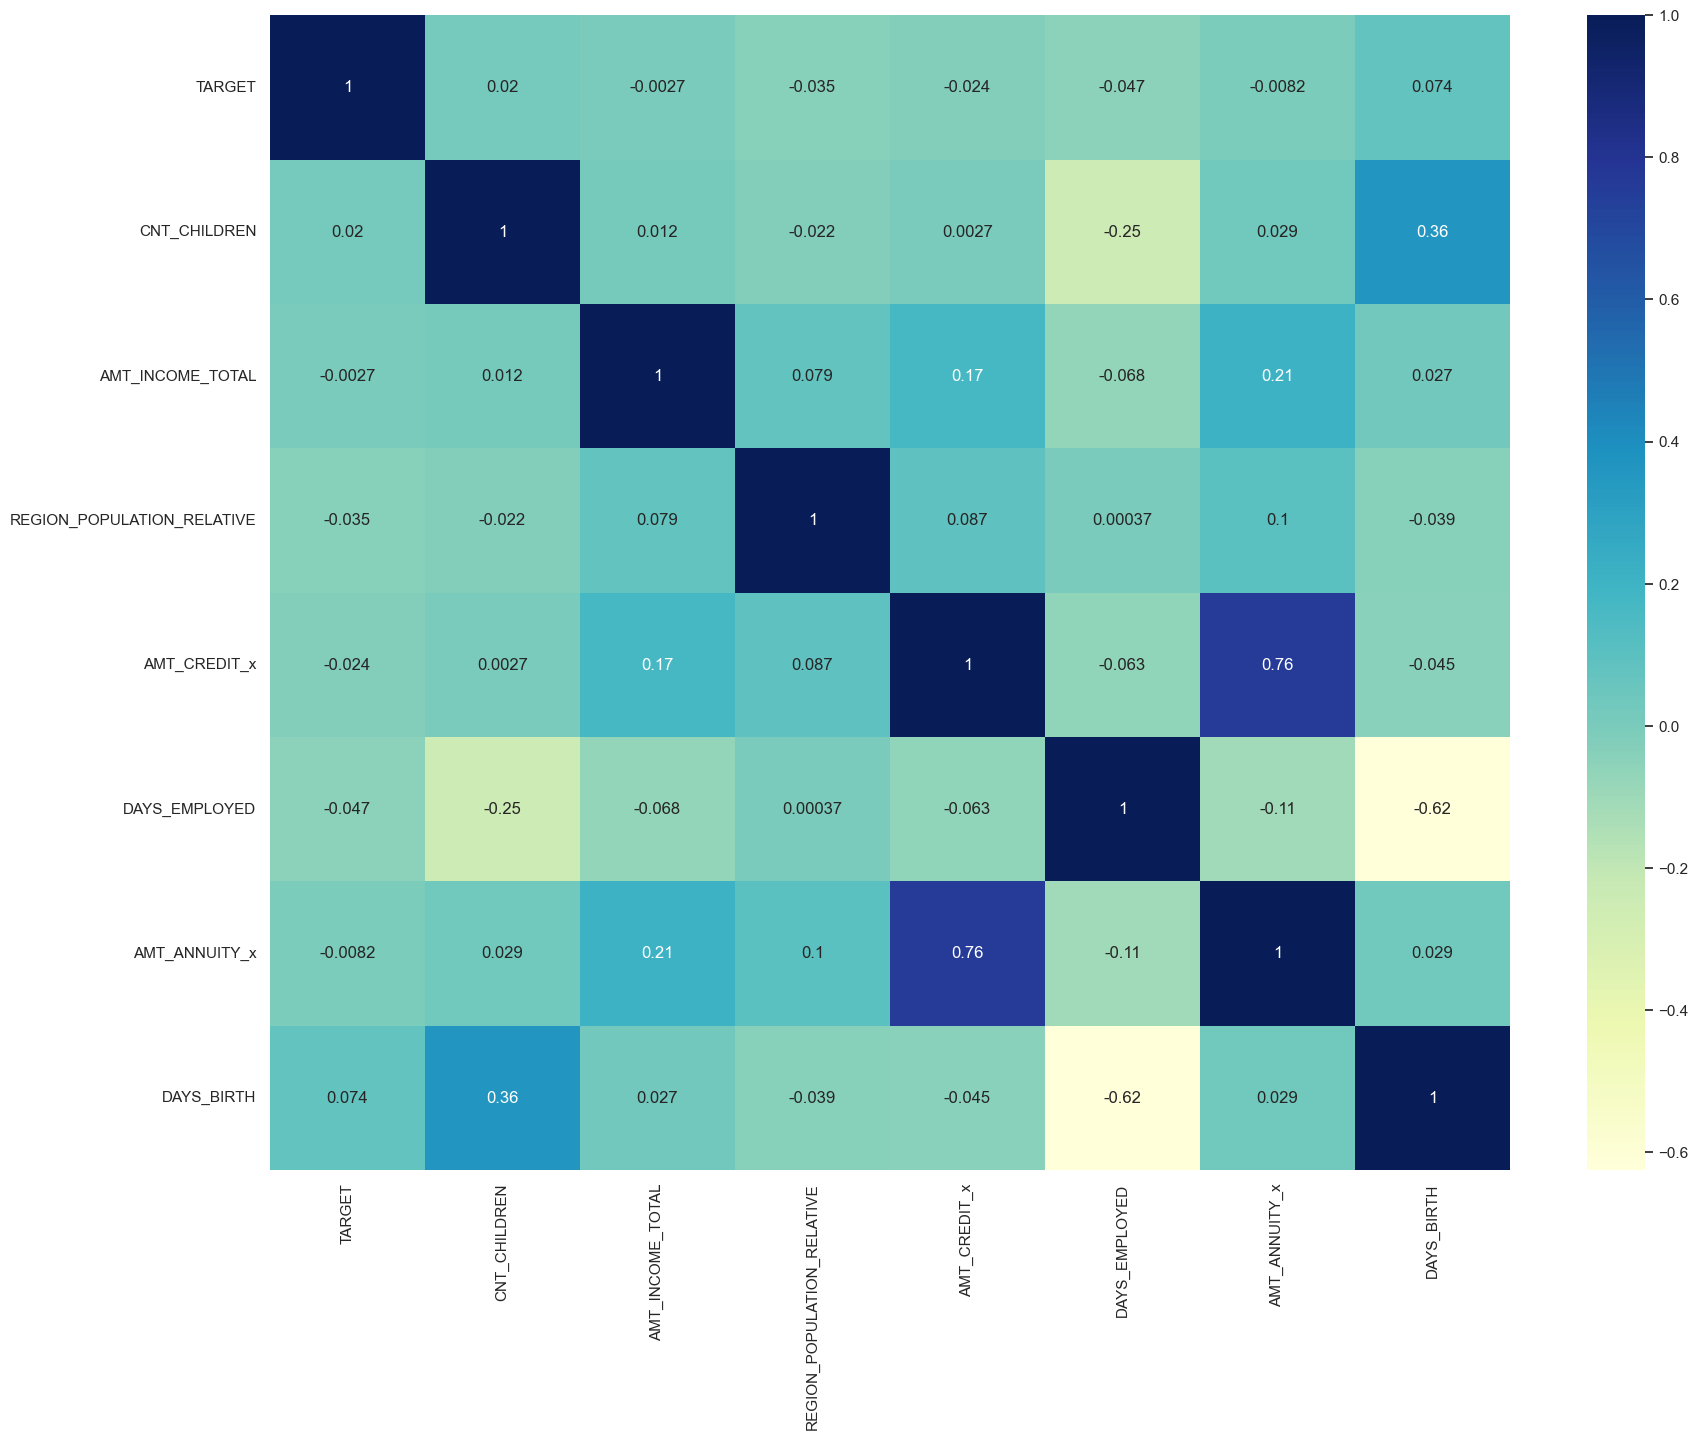

In [18]:
# Selecting relevant numerical features for correlation mapping
numerical_corr = df[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
                     'AMT_CREDIT_x', 'DAYS_EMPLOYED', 'AMT_ANNUITY_x', 'DAYS_BIRTH']]

# Plotting a heatmap to see correlations
plt.figure(figsize=(20, 15))
sns.heatmap(numerical_corr.corr(), cmap="YlGnBu", annot=True)
plt.show()

Observations:

Credit and Annuity amount has the highest correlation.
Days_Employed is less correlational with Number of Children(CNT_CHILDREN.
Target doesn't show strong correlation among any features presented in the dataset.

#### Distribution of Age groups

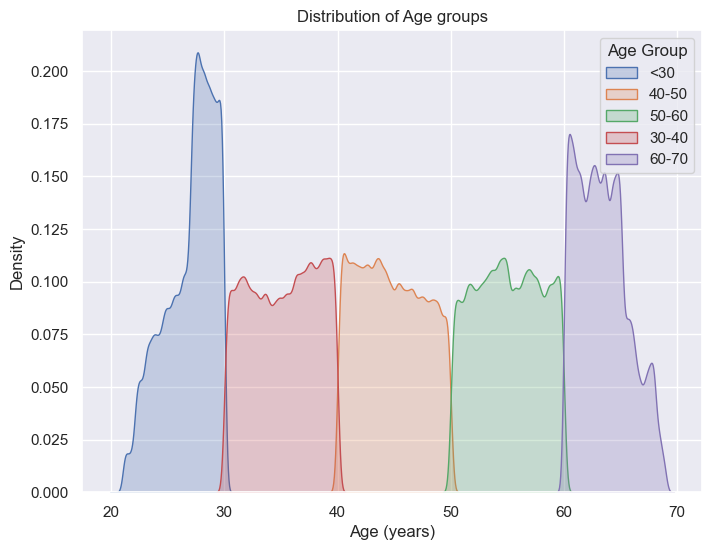

In [19]:
df['AGE_GROUP'] = pd.cut((df.DAYS_BIRTH.abs() / 365), [0, 30, 40, 50, 60, 70], 
                         labels=['<30', '30-40', '40-50', '50-60', '60-70'])
age_group_counts = df['AGE_GROUP'].value_counts()
plt.figure(figsize=(8, 6))
for age_group in df['AGE_GROUP'].unique():
    sns.kdeplot(df[df['AGE_GROUP'] == age_group]['DAYS_BIRTH'].abs() / 365, label=age_group, shade=True)

plt.title('Distribution of Age groups')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend(title='Age Group')

plt.show()

#### Gender

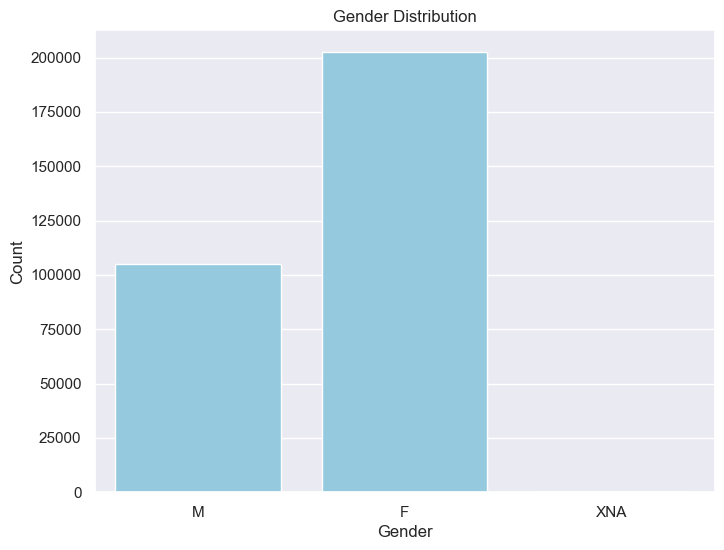

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_app, x='CODE_GENDER', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Education type

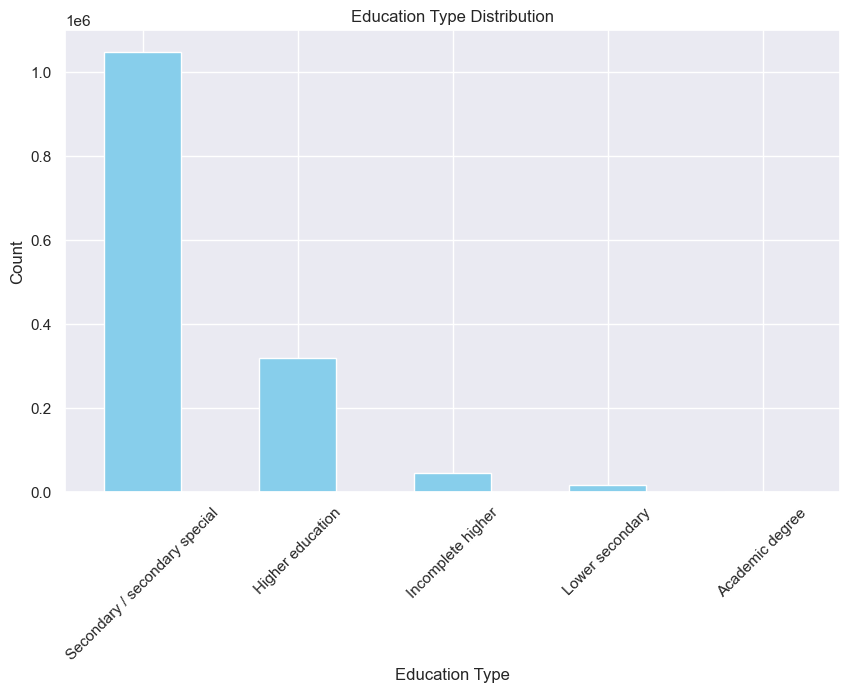

In [21]:
education_type_counts = df['NAME_EDUCATION_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
education_type_counts.plot(kind='bar', color='skyblue')
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

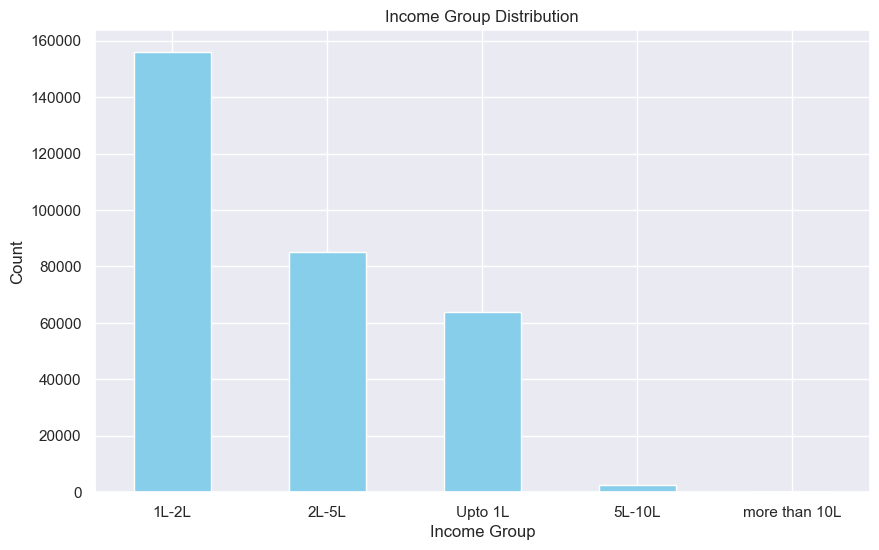

In [22]:
df['INCOME_GROUP'] = pd.cut(df_app.AMT_INCOME_TOTAL, [0, 100000, 200000, 500000, 1000000, 117000000],
                            labels=['Upto 1L', '1L-2L', '2L-5L', '5L-10L', 'more than 10L'])

# Get the value counts for 'INCOME_GROUP'
income_group_counts = df['INCOME_GROUP'].value_counts()

plt.figure(figsize=(10, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Observation:
1. Females are the majority availers of loan when compared with men.
2. Secondary education category is the highest availers of loan.
3. Age group 30-40 are the highest availers of loan and 60-70 age group is the lowest.

#### Top 10 most common incomes compared to income median

In [23]:
top_10_incomes = df['AMT_INCOME_TOTAL'].value_counts().index[:10]

fig = px.bar(x=top_10_incomes[::-1], y=range(1, len(top_10_incomes) + 1), orientation='h',
             color=top_10_incomes[::-1], labels={'y': 'Rank', 'x': 'Income Value'},
             title='Top 10 Incomes with Median', hover_name=top_10_incomes[::-1],
             template='plotly', text=top_10_incomes[::-1], color_continuous_scale='viridis_r')

fig.add_shape(type='line', x0=df['AMT_INCOME_TOTAL'].median(), x1=df['AMT_INCOME_TOTAL'].median(),
              y0=-0.5, y1=len(top_10_incomes) - 0.5, line=dict(color='red', width=2))

fig.update_layout(yaxis=dict(tickvals=list(range(len(top_10_incomes))), ticktext=list(range(1, len(top_10_incomes) + 1))))

fig.show()

Observation: It is noticeable that the count of the incomes that are higher than the median is equal to the number of incomes lower than the median, which means that income doesn't make a difference on loans.

# 

## Processing NaN values

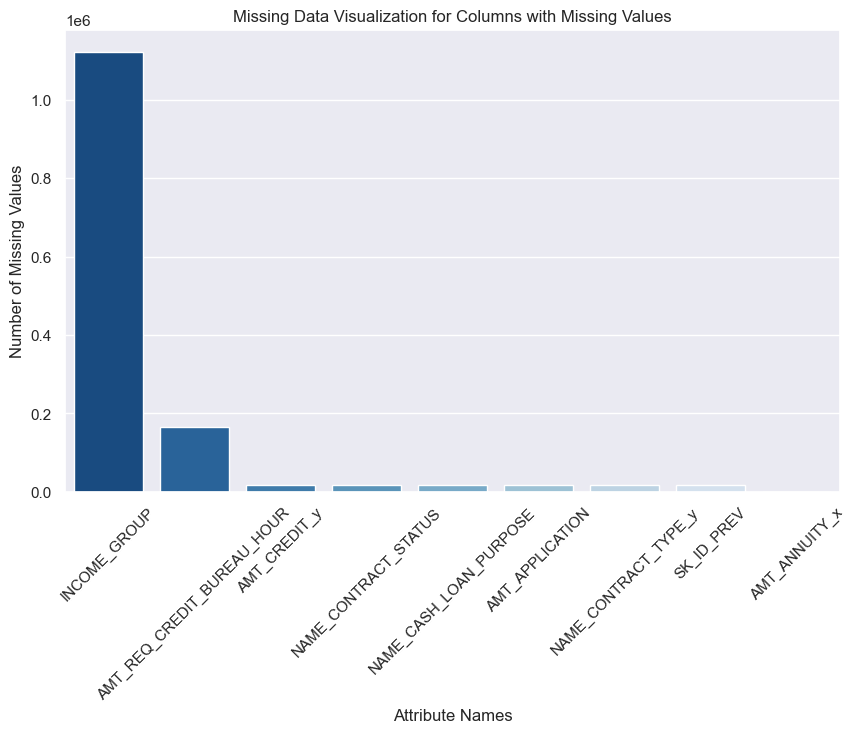

In [24]:
missing_counts = df.isnull().sum().sort_values(ascending=False)

missing_counts = missing_counts[missing_counts > 0]

colors = list(reversed(sns.color_palette("Blues", len(missing_counts))))

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts, palette=colors)
plt.title('Missing Data Visualization for Columns with Missing Values')
plt.xlabel('Attribute Names')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')

plt.show()

## Removing NaN values
Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [25]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

1387274

In [26]:
df = df.dropna()

In [27]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

0

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [28]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

214317

In [29]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54360 entries, 0 to 307506
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  54360 non-null  int64   
 1   TARGET                      54360 non-null  int64   
 2   NAME_CONTRACT_TYPE_x        54360 non-null  object  
 3   CODE_GENDER                 54360 non-null  object  
 4   FLAG_OWN_CAR                54360 non-null  object  
 5   FLAG_OWN_REALTY             54360 non-null  object  
 6   CNT_CHILDREN                54360 non-null  int64   
 7   AMT_INCOME_TOTAL            54360 non-null  float64 
 8   AMT_CREDIT_x                54360 non-null  float64 
 9   AMT_ANNUITY_x               54360 non-null  float64 
 10  NAME_INCOME_TYPE            54360 non-null  object  
 11  NAME_EDUCATION_TYPE         54360 non-null  object  
 12  NAME_FAMILY_STATUS          54360 non-null  object  
 13  NAME_HOUSING_TYPE   

#### Our finalised dataset consist of 307506 rows in 27 columns.

### Converting negative values to absolute values

In [30]:
cols_with_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
df[cols_with_negative] = df[cols_with_negative].abs()
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0       100002       1           Cash loans           M            N   
1       100003       0           Cash loans           F            N   
4       100004       0      Revolving loans           M            Y   
14      100007       0           Cash loans           M            N   
20      100008       0           Cash loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                Y             0         202500.00     406597.50   
1                N             0         270000.00    1293502.50   
4                Y             0          67500.00     135000.00   
14               Y             0         121500.00     513000.00   
20               Y             0          99000.00     490495.50   

    AMT_ANNUITY_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        24700.50          Working  Secondary / secondary special   
1        35698.50    State servant               Higher education   
4         6750.00          Working  Secondary / secondary special   
14       21865.50          Working  Secondary / secondary special   
20       27517.50    State servant  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                        0.02   
1                Married  House / apartment                        0.00   
4   Single / not married  House / apartment                        0.01   
14  Single / not married  House / apartment                        0.03   
20               Married  House / apartment                        0.04   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_HOUR  \
0         9461            637            3648.00                        0.00   
1        16765           1188            1186.00                        0.00   
4        19046            225            4260.00                        0.00   
14       19932           3038            4311.00                        0.00   
20       16941           1588            4970.00                        0.00   

    SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0   1038818.00       Consumer loans        179055.00     179055.00   
1   1810518.00           Cash loans        900000.00    1035882.00   
4   1564014.00       Consumer loans         24282.00      20106.00   
14  2001242.00           Cash loans        180000.00     180000.00   
20  2218188.00       Consumer loans        162598.50     162598.50   

   NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS AGE_GROUP INCOME_GROUP  
0                     XAP             Approved       <30        2L-5L  
1                     XNA             Approved     40-50        2L-5L  
4                     XAP             Approved     50-60        1L-2L  
14                    XNA             Approved     50-60        1L-2L  
20                    XAP             Approved     40-50        1L-2L

In [31]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1           Cash loans           M             0   
1       100003       0           Cash loans           F             0   
4       100004       0      Revolving loans           M             1   
14      100007       0           Cash loans           M             0   
20      100008       0           Cash loans           M             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                 1             0         202500.00     406597.50   
1                 0             0         270000.00    1293502.50   
4                 1             0          67500.00     135000.00   
14                1             0         121500.00     513000.00   
20                1             0          99000.00     490495.50   

    AMT_ANNUITY_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        24700.50          Working  Secondary / secondary special   
1        35698.50    State servant               Higher education   
4         6750.00          Working  Secondary / secondary special   
14       21865.50          Working  Secondary / secondary special   
20       27517.50    State servant  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                        0.02   
1                Married  House / apartment                        0.00   
4   Single / not married  House / apartment                        0.01   
14  Single / not married  House / apartment                        0.03   
20               Married  House / apartment                        0.04   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_HOUR  \
0         9461            637            3648.00                        0.00   
1        16765           1188            1186.00                        0.00   
4        19046            225            4260.00                        0.00   
14       19932           3038            4311.00                        0.00   
20       16941           1588            4970.00                        0.00   

    SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0   1038818.00       Consumer loans        179055.00     179055.00   
1   1810518.00           Cash loans        900000.00    1035882.00   
4   1564014.00       Consumer loans         24282.00      20106.00   
14  2001242.00           Cash loans        180000.00     180000.00   
20  2218188.00       Consumer loans        162598.50     162598.50   

   NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS AGE_GROUP INCOME_GROUP  
0                     XAP             Approved       <30        2L-5L  
1                     XNA             Approved     40-50        2L-5L  
4                     XAP             Approved     50-60        1L-2L  
14                    XNA             Approved     50-60        1L-2L  
20                    XAP             Approved     40-50        1L-2L

### Getting number and names of the object columns

In [32]:
obj_cols = df.select_dtypes(include='object')
num_obj_cols = obj_cols.shape[1]
num_obj_cols

9

In [33]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS']

### Getting all unique values for each object column 

In [34]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [35]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [36]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [37]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [38]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [39]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [40]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Buying a new car', 'Medicine',
       'Furniture', 'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Payments on other loans', 'Buying a home', 'Business development',
       'Journey', 'Gasification / water supply', 'Buying a garage',
       'Hobby', 'Money for a third person'], dtype=object)

In [41]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Replacing all categorical variables with numeric values

In [42]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 
                 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 
                 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 
                 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 
                 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 
                 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 
                 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 
                 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 
                 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 
                 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 
                 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 0, 'Unused offer': 0})
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1                     0            0             0   
1       100003       0                     0            1             0   
4       100004       0                     1            0             1   
14      100007       0                     0            0             0   
20      100008       0                     0            0             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                 1             0         202500.00     406597.50   
1                 0             0         270000.00    1293502.50   
4                 1             0          67500.00     135000.00   
14                1             0         121500.00     513000.00   
20                1             0          99000.00     490495.50   

    AMT_ANNUITY_x  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0        24700.50                 1                    0                   0   
1        35698.50                 2                    1                   1   
4         6750.00                 1                    0                   0   
14       21865.50                 1                    0                   0   
20       27517.50                 2                    0                   1   

    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                        0.02        9461            637   
1                   0                        0.00       16765           1188   
4                   0                        0.01       19046            225   
14                  0                        0.03       19932           3038   
20                  0                        0.04       16941           1588   

    DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_HOUR  SK_ID_PREV  \
0             3648.00                        0.00  1038818.00   
1             1186.00                        0.00  1810518.00   
4             4260.00                        0.00  1564014.00   
14            4311.00                        0.00  2001242.00   
20            4970.00                        0.00  2218188.00   

    NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0                      2        179055.00     179055.00   
1                      0        900000.00    1035882.00   
4                      2         24282.00      20106.00   
14                     0        180000.00     180000.00   
20                     2        162598.50     162598.50   

    NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS AGE_GROUP INCOME_GROUP  
0                        0                     1       <30        2L-5L  
1                        3                     1     40-50        2L-5L  
4                        0                     1     50-60        1L-2L  
14                       3                     1     50-60        1L-2L  
20                       0                     1     40-50        1L-2L

#### Our dataset is now completely filled with numerical values only

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Approved': 1, 'Refused': 0, 'Canceled': 0, 'Unused offer': 0 (NAME_CONTRACT_STATUS is our target column where we see if customer was successful or not with application. In this case, 1 stands for Approved and that's successful customer why all other outcomems are unsuccessful, therefore 0.)


# 

## Bivariate Analysis¶

In [43]:
def bivariate_scatter(variable_x, variable_y, label_orientation=False):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 1], x=variable_x, y=variable_y, ax=ax1)
    ax1.set_title('DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 0], x=variable_x, y=variable_y, ax=ax2)
    ax2.set_title('NON-DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

#### Bivariate Analysis with Target Variable 

A scatter plot is used to understand the correlation between two numeric variables with Target variable.


Income vs Credit

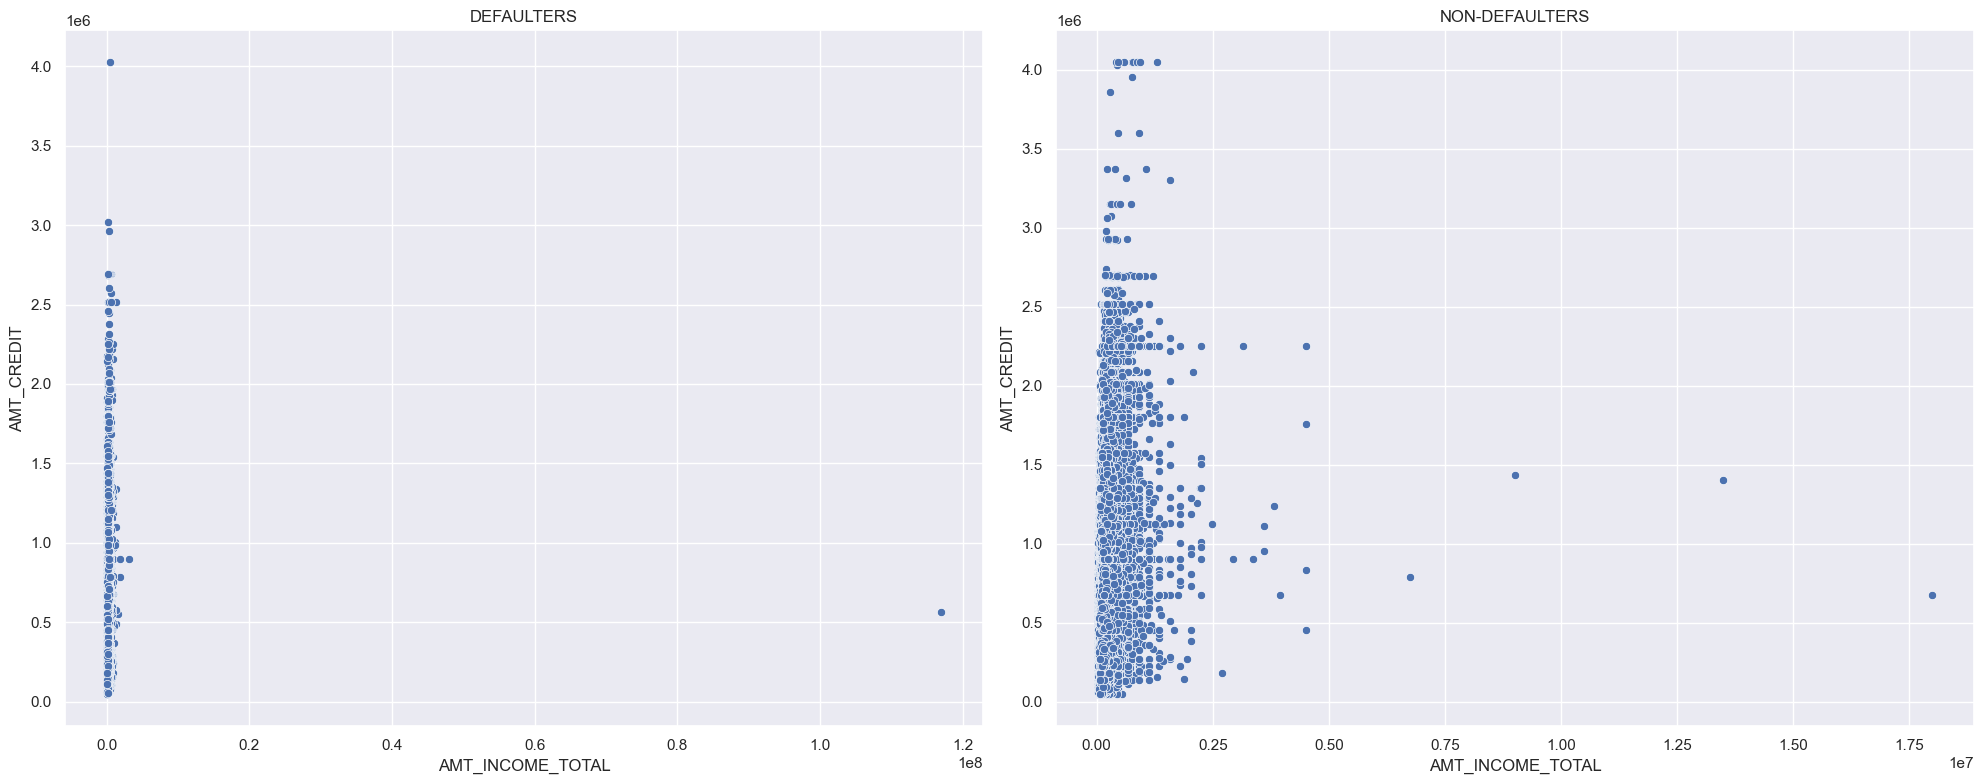

In [44]:
bivariate_scatter('AMT_INCOME_TOTAL','AMT_CREDIT')

Observations:

Payment defaulters are majority low income group people.

Also, higher credit amount is given for low income people than higher income people.

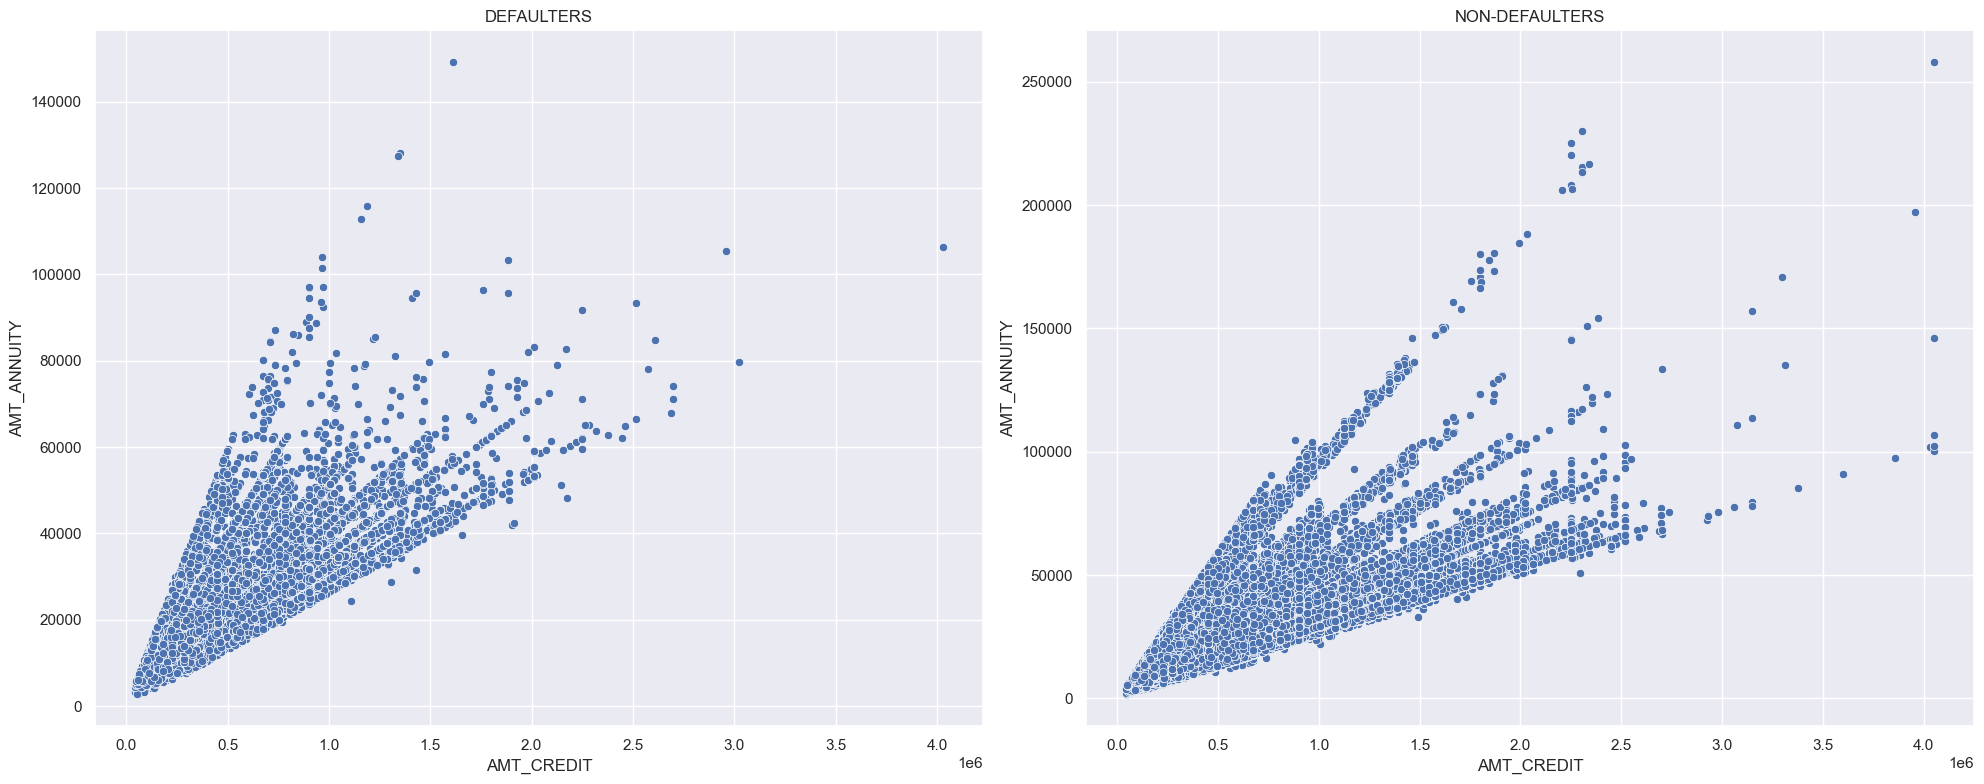

In [45]:
bivariate_scatter('AMT_CREDIT','AMT_ANNUITY')

Observations:Positive correlation observed between credit and annuity 

#### Analysising the continuous variables with target variable

In [46]:
#defining plotting function for box plots
def boxplot_target(variable,label_orientation=False):
    
    #setting subplots & fig size
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,4))
    
    #plot1
    sns.boxplot(ax=ax1,data=df_app[df_app['TARGET']==1],x=variable,showfliers=False)
    ax1.set_title('DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    #plot2
    sns.boxplot(ax=ax2,data=df_app[df_app['TARGET']==0],x=variable,showfliers=False)
    ax2.set_title('NON-DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)

    plt.show()

In [47]:
df_app['DAYS_EMPLOYED']=abs(df_app.DAYS_EMPLOYED)//365

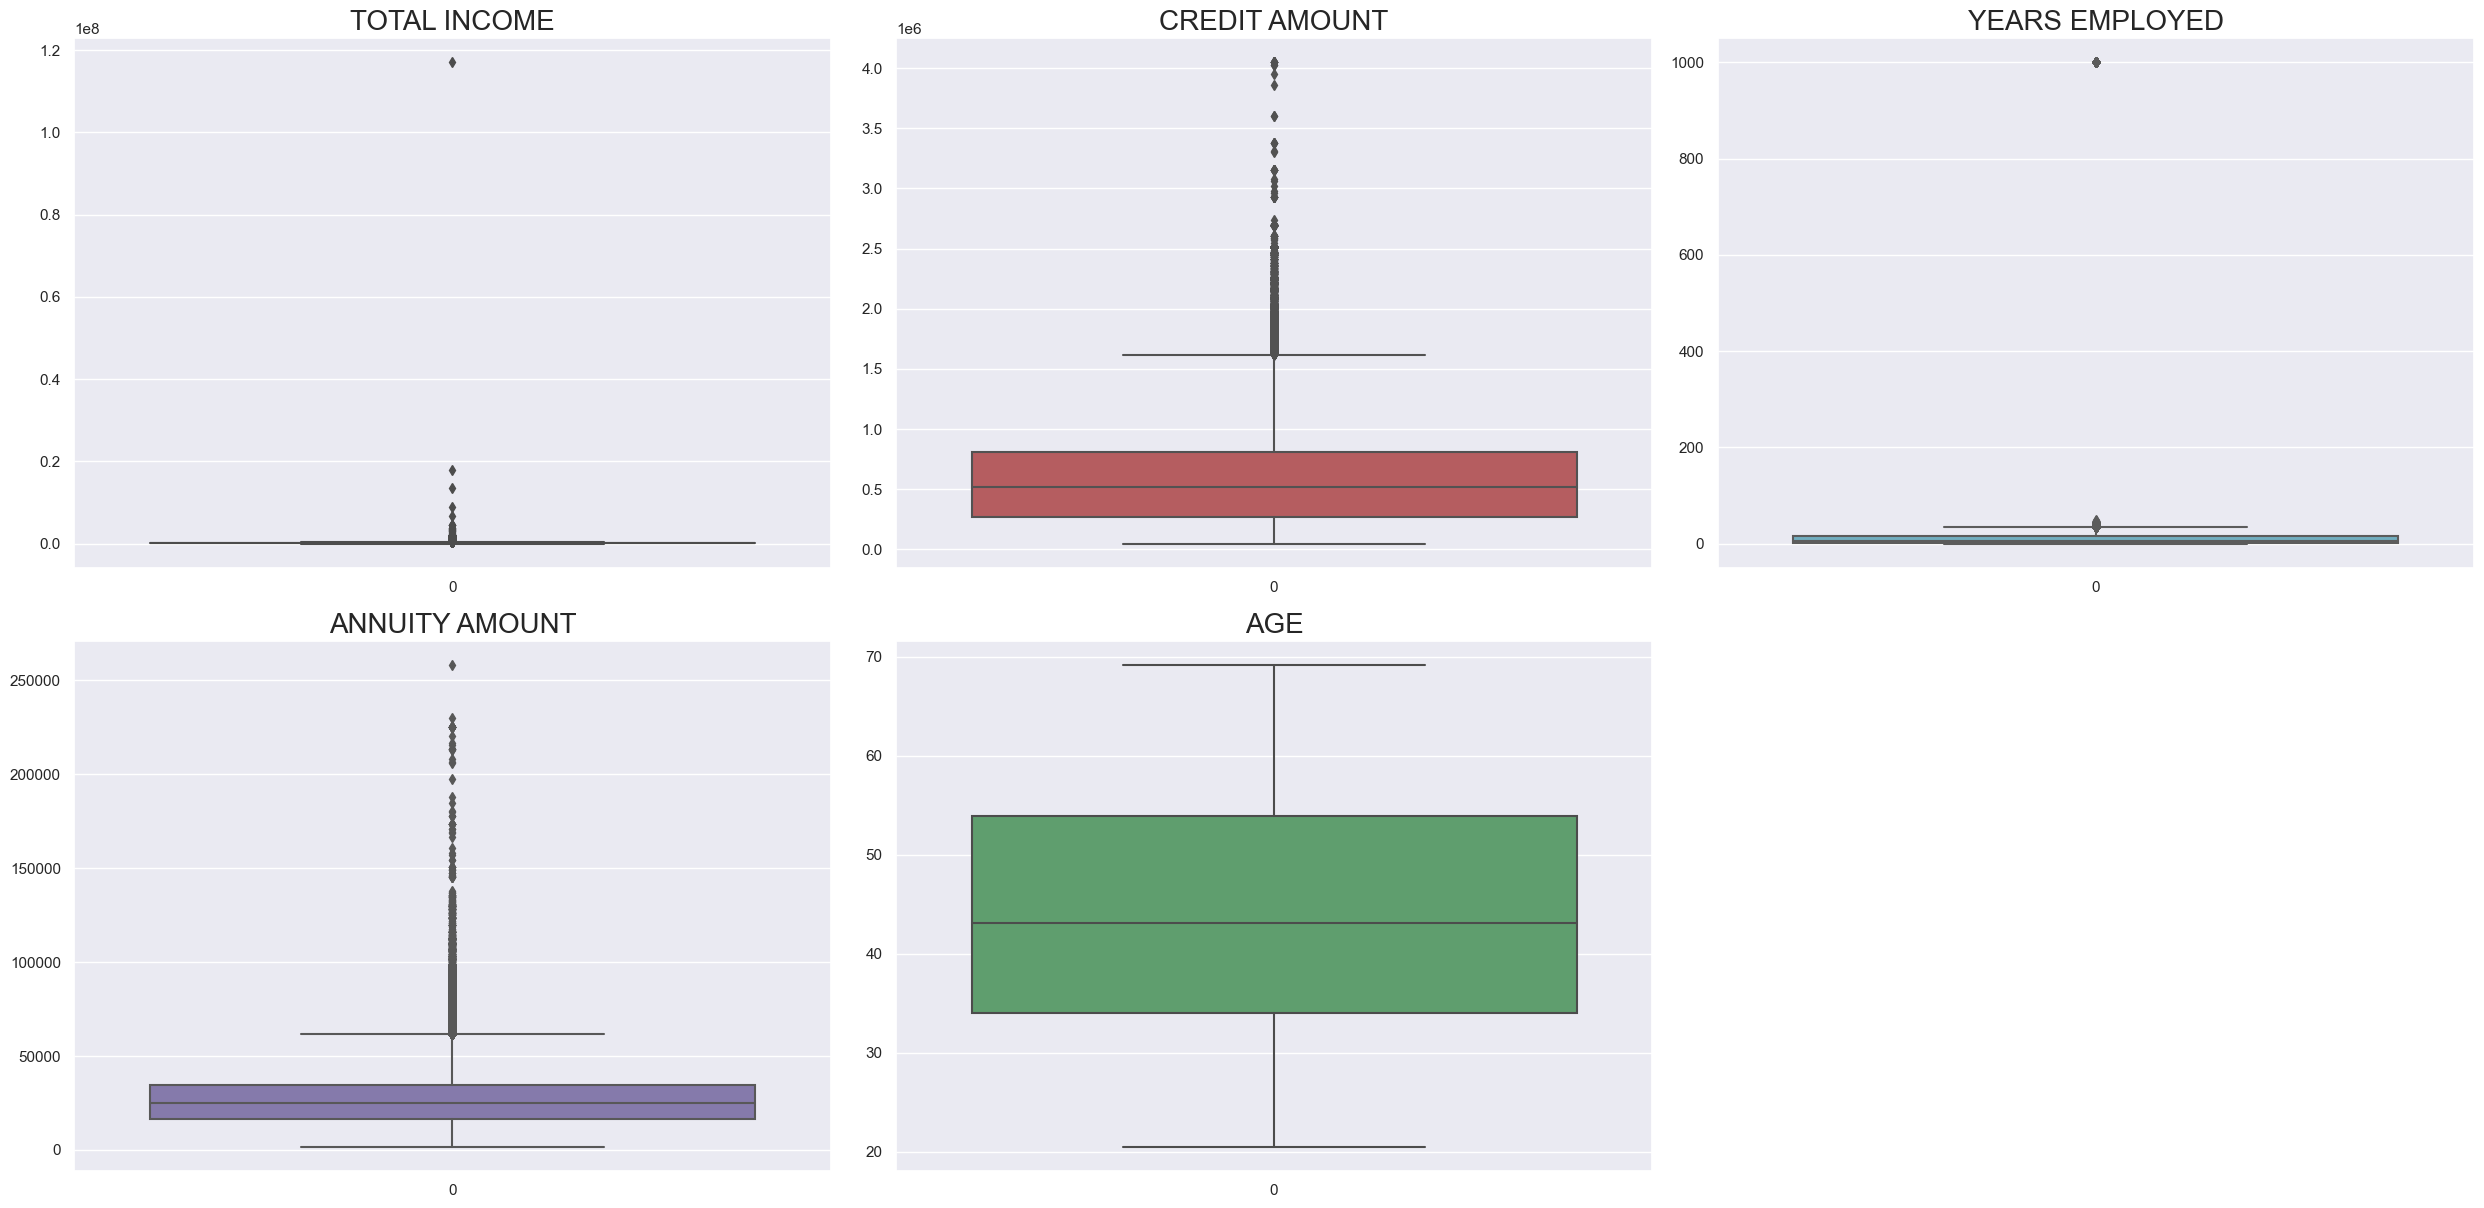

In [48]:
#Setting plot size
plt.figure(figsize = (25, 18))

#Creating Subplots

#1.Total Income
plt.subplot(3,3,1)
plt.title("TOTAL INCOME", fontsize=20)
sns.boxplot(df_app.AMT_INCOME_TOTAL,color='g')

#2.Credit Amount
plt.subplot(3,3,2)
plt.title("CREDIT AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_CREDIT,color='r')

#3.Days Employed
plt.subplot(3,3,3)
plt.title("YEARS EMPLOYED", fontsize=20)
sns.boxplot(df_app.DAYS_EMPLOYED,color='c')

#4.Annuity Amount
plt.subplot(3,3,4)
plt.title("ANNUITY AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_ANNUITY,color='m')

#5.Age
plt.subplot(3,3,5)
plt.title("AGE", fontsize=20)
sns.boxplot(abs(df_app.DAYS_BIRTH)/365,color='g')


plt.tight_layout()
plt.show()

Observation:Days of  having one outliner with value 1000 years.
Annual credit and Annual income has couple of outliners

#### Days of employment with Target variable

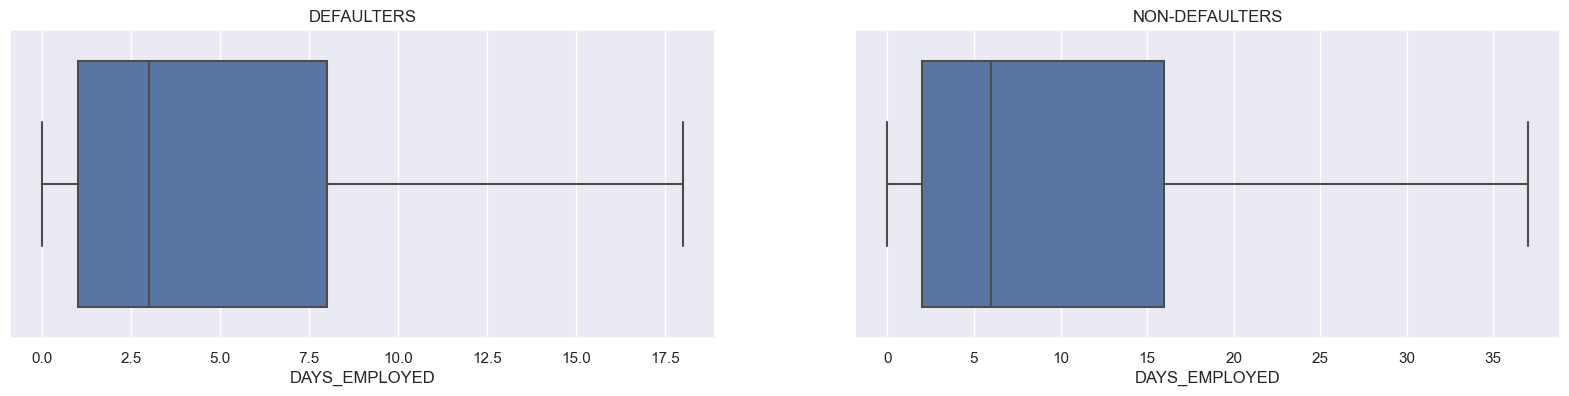

In [49]:
boxplot_target('DAYS_EMPLOYED',label_orientation=False)

Observation:Payment Defaulters have been employed for an average of less than 3 years and. having one outliner with value 1000 years
Repayers are employed for an average of 5+ years

 #### Annual Income with Target variable

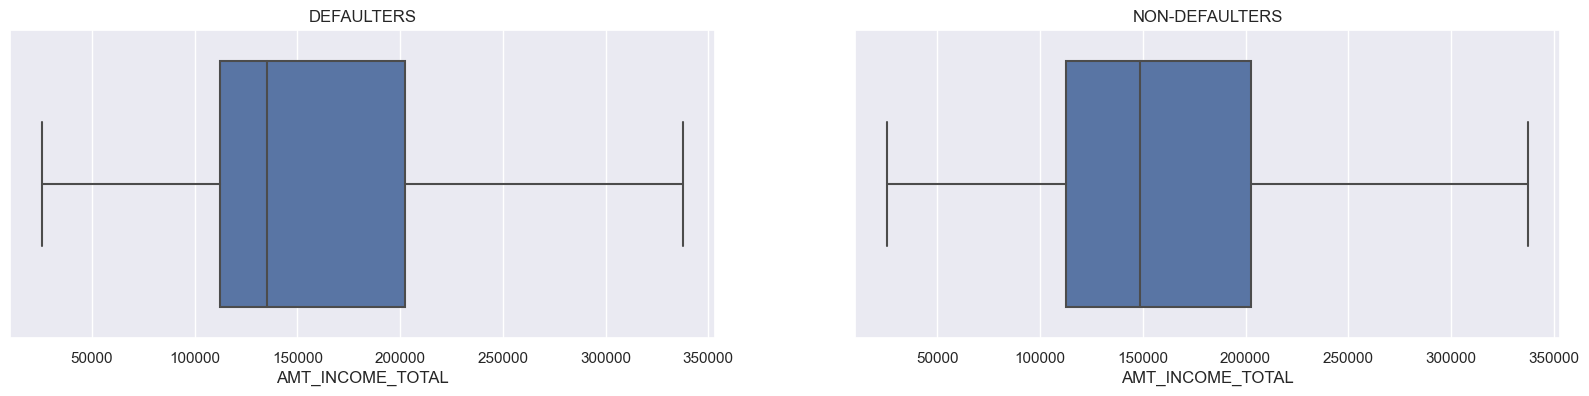

In [50]:
boxplot_target('AMT_INCOME_TOTAL',label_orientation=False)

In [51]:
#defining plotting functions
def bivariate_pivot(val,ind,col,title,label_orientation=False):
    
    #pivot table function
    table1=pd.pivot_table(data=df,values=val,index=ind,columns=col,aggfunc=np.mean)
    table1.plot(kind='bar',stacked='True',figsize=[20,10])
    plt.title(title)
    if(label_orientation==True):
        plt.xticks(rotation=45)
    plt.show() 
    print(table1)
    print(' ')
    print(df[ind].value_counts())

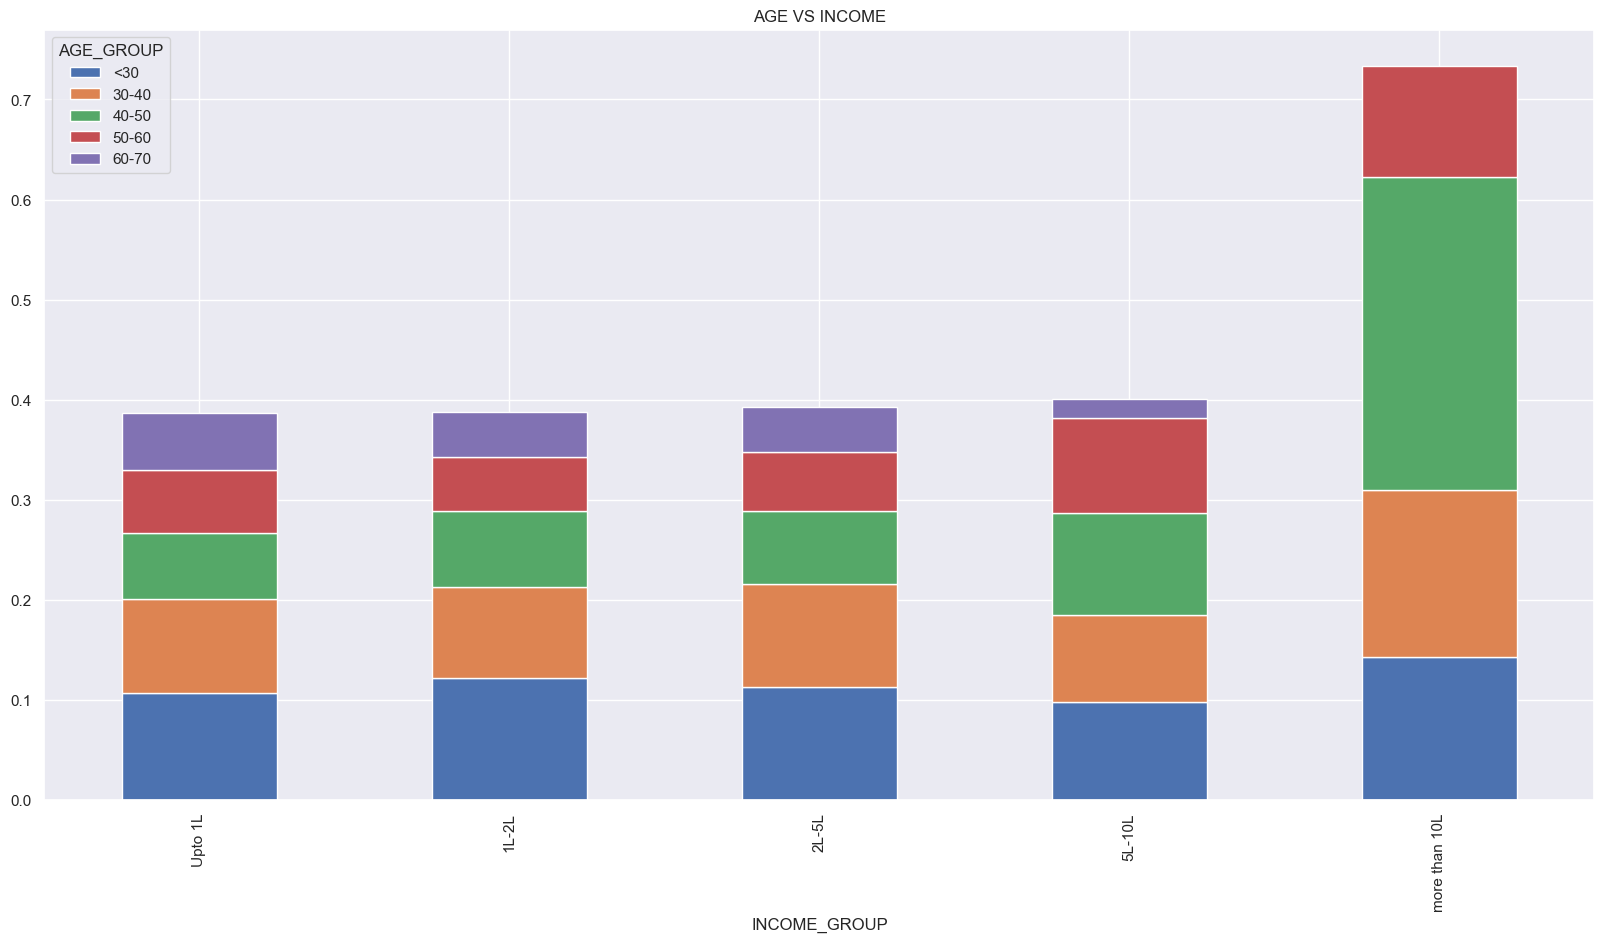

AGE_GROUP      <30  30-40  40-50  50-60  60-70
INCOME_GROUP                                  
Upto 1L       0.11   0.09   0.07   0.06   0.06
1L-2L         0.12   0.09   0.08   0.05   0.04
2L-5L         0.11   0.10   0.07   0.06   0.05
5L-10L        0.10   0.09   0.10   0.09   0.02
more than 10L 0.14   0.17   0.31   0.11   0.00
 
INCOME_GROUP
1L-2L            27634
2L-5L            15043
Upto 1L          11206
5L-10L             421
more than 10L       56
Name: count, dtype: int64


In [52]:
bivariate_pivot("TARGET",'INCOME_GROUP','AGE_GROUP','AGE VS INCOME')

Observation: Age group of <30 earning less than 1Lakh are most likely to have payment difficulties.
Income group 5L-10L shows the least chances of payment difficulty.
Income group 'more than 10L' are outliers, thus considering them as isolated events.

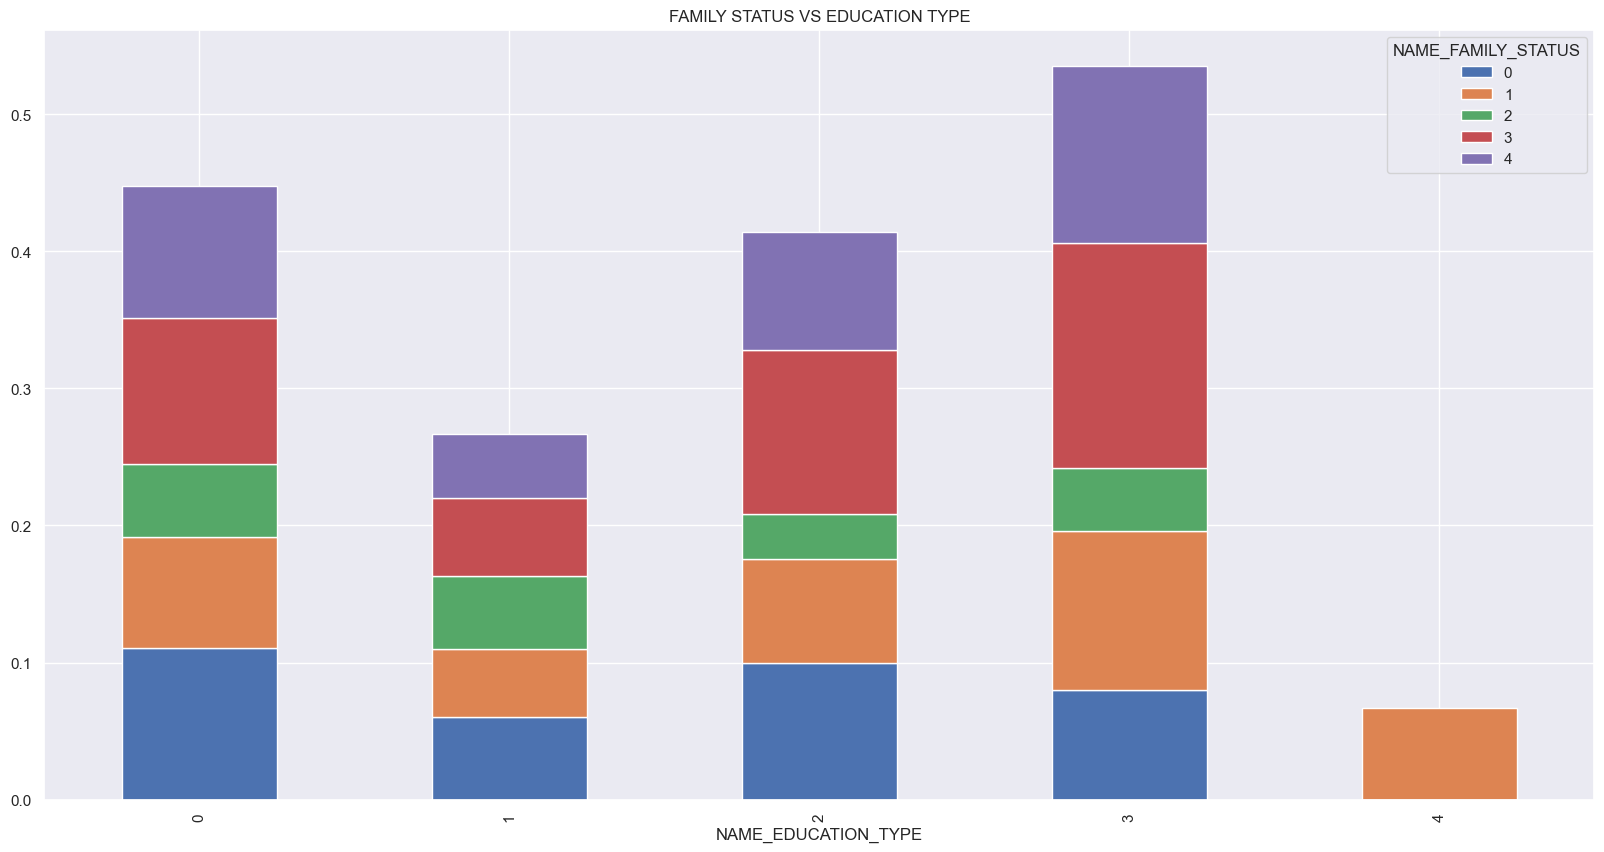

NAME_FAMILY_STATUS     0    1    2    3    4
NAME_EDUCATION_TYPE                         
0                   0.11 0.08 0.05 0.11 0.10
1                   0.06 0.05 0.05 0.06 0.05
2                   0.10 0.08 0.03 0.12 0.09
3                   0.08 0.12 0.05 0.16 0.13
4                   0.00 0.07  NaN 0.00 0.00
 
NAME_EDUCATION_TYPE
0    38896
1    13096
2     1677
3      669
4       22
Name: count, dtype: int64


In [53]:
bivariate_pivot("TARGET",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','FAMILY STATUS VS EDUCATION TYPE')

In [54]:
df = df.drop(['AGE_GROUP', 'INCOME_GROUP'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54360 entries, 0 to 307506
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  54360 non-null  int64  
 1   TARGET                      54360 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        54360 non-null  int64  
 3   CODE_GENDER                 54360 non-null  int64  
 4   FLAG_OWN_CAR                54360 non-null  int64  
 5   FLAG_OWN_REALTY             54360 non-null  int64  
 6   CNT_CHILDREN                54360 non-null  int64  
 7   AMT_INCOME_TOTAL            54360 non-null  float64
 8   AMT_CREDIT_x                54360 non-null  float64
 9   AMT_ANNUITY_x               54360 non-null  float64
 10  NAME_INCOME_TYPE            54360 non-null  int64  
 11  NAME_EDUCATION_TYPE         54360 non-null  int64  
 12  NAME_FAMILY_STATUS          54360 non-null  int64  
 13  NAME_HOUSING_TYPE           54360 n

Observation:
    Lower secondary education-Civil Marriage & Single people are the most risky category exhibiting payment difficulty.
Widows have shown less percentage of payment difficulty through all Education types.
Academic degree Education type shows less chances of payment difficulty.

# 

# Defining the problem statement:

### 1. Problem statement
Create a Predictive model which can tell if application contract status is sucessful or not?

Target Variable: Contract_Status
   
Successful = 1 Application is successful
Unsuccessful = 0 Application is unsuccessful

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

### 2. Problem statement

Create a Predictive model which can tell if application Target status - late payment/Defaulters  or not ?

Target Variable: Target
   
Defaulter = 1 - late payment of loan
Non_Defaulter = 0 - non late payment of loan

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

# 

# Machine Learning

### Objective - Predict the contract_status

In [55]:
models = ['Decision Tree','Logistic Regression', 'Random Forest', 'KNN']
Prediction=['Contract_status','Target','Target','Target']

scores = []

# 

# Decision Tree Model

### Feature selection

In [56]:
feature_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 
                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
                'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 
                'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

Now, I will use RFE method to rank the importance of features in my dataset. Attributes with higher ranking means those are of higher importance. 

In [57]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

importance = rfe.ranking_
importance

array([13, 15, 12,  8,  5,  2,  1, 11, 10,  7, 14,  3,  1,  1,  1, 16,  6,
        4,  1,  9])

In [58]:
col_names = X.columns

feat_ranks = list(zip(col_names, rfe.ranking_))

feat_ranks_sorted = sorted(feat_ranks, key=lambda x: x[1])

for i, (col, rank) in enumerate(feat_ranks_sorted):
    print(f"{i+1}. {col}: {rank}")

1. AMT_ANNUITY_x: 1
2. DAYS_BIRTH: 1
3. DAYS_EMPLOYED: 1
4. DAYS_REGISTRATION: 1
5. AMT_CREDIT_y: 1
6. AMT_CREDIT_x: 2
7. REGION_POPULATION_RELATIVE: 3
8. AMT_APPLICATION: 4
9. AMT_INCOME_TOTAL: 5
10. NAME_CONTRACT_TYPE_y: 6
11. NAME_FAMILY_STATUS: 7
12. CNT_CHILDREN: 8
13. NAME_CASH_LOAN_PURPOSE: 9
14. NAME_EDUCATION_TYPE: 10
15. NAME_INCOME_TYPE: 11
16. FLAG_OWN_REALTY: 12
17. CODE_GENDER: 13
18. NAME_HOUSING_TYPE: 14
19. FLAG_OWN_CAR: 15
20. AMT_REQ_CREDIT_BUREAU_HOUR: 16


I will use features that are within top 3 in importance.

In [59]:
feature_cols = ['AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'AMT_CREDIT_y', 'AMT_APPLICATION', 'AMT_INCOME_TOTAL']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

### Splitting dataset into training set and test set (70% training and 30% test)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54360, 7), (54360,), (38052, 7), (16308, 7), (38052,), (16308,))

In [62]:
clsf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clsf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [63]:
y_pred = clsf.predict(X_test)

In [64]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("Test Accuracy (Gini):", test_accuracy)
print("Test Precision (Gini):", test_precision)
print("Test Recall (Gini):", test_recall)
print("Test F1 Score (Gini):", test_f1)

Test Accuracy (Gini): 0.8769928869266618
Test Precision (Gini): 0.8598262834545582
Test Recall (Gini): 0.9982782651471673
Test F1 Score (Gini): 0.9238940739054556


In [65]:
scores.append(clsf.score(X_test,y_test))

### Calculating Train and Test score

In [66]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.876353411121623
Test set score: 0.8769928869266618


# 

Training and Test cores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 
This model is pretty good at figuring out which applications are successful and which not, having test accuracy at 87.60% and test precision at 86.11%.  F1 score tells us that model is good at balancing both, accuracy and completeness in its predicitions. 

### Splitting dataset into training set and test set (80% training and 20% test)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
clsf2 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clsf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [69]:
y_pred = clsf2.predict(X_test)

In [70]:
test2_accuracy = accuracy_score(y_test, y_pred)
test2_precision = precision_score(y_test, y_pred)
test2_recall = recall_score(y_test, y_pred)
test2_f1 = f1_score(y_test, y_pred)

print("Test2 Accuracy (Gini):", test_accuracy)
print("Test2 Precision (Gini):", test_precision)
print("Test2 Recall (Gini):", test_recall)
print("Test2 F1 Score (Gini):", test_f1)

Test2 Accuracy (Gini): 0.8769928869266618
Test2 Precision (Gini): 0.8598262834545582
Test2 Recall (Gini): 0.9982782651471673
Test2 F1 Score (Gini): 0.9238940739054556


### Calculating Train and Test score

In [71]:
train_score = clsf2.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf2.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.8762647167034584
Test set score: 0.8779433406916851


In [72]:
scores.append(clsf2.score(X_test,y_test))

Scores of 80/20 split are pretty much the same as with 70/30 split, even slightly improved.

<Axes: >

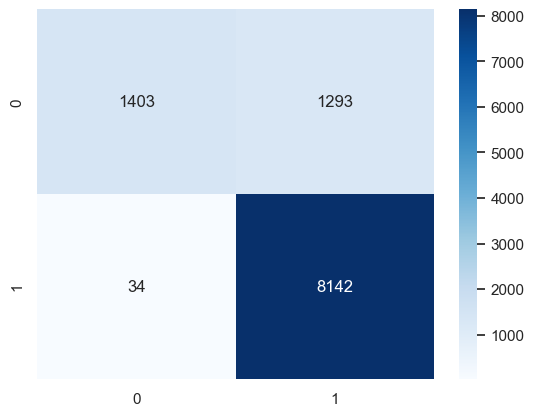

In [73]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

We define Regression metrics are the Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE). Let’s define a function that returns them according to the given true (real) and predicted values:

In [74]:
# Define MAE and RMSE for regression

def evaluate_predictions(true, predictions):
    mae = np.mean(abs(true - predictions))
    rmse = np.sqrt(np.mean((true - predictions) ** 2))  # or: np.sqrt(mean_squared_error(ytrue, ypredicted))
    return mae, rmse

we can create a naive baseline model that predicts the median of the Test subset and we compare its performance to our model’s results. Obviously, we don’t want our model to be worse than a naive baseline median!

In [75]:
# Naive baseline is the median

median_pred = y_train.median()
median_preds = [median_pred for _ in range(len(y_test))]

baseline_mae, baseline_rmse = evaluate_predictions(median_preds, y_test)
print('Baseline MAE: ', round(baseline_mae,2))
print('Baseline RMSE: ', round(baseline_rmse,2))

Baseline MAE:  0.25
Baseline RMSE:  0.5


In [76]:

Dec_mae, Dec_rmse = evaluate_predictions(y_test, y_pred)
Dec_r2 = r2_score(y_test, y_pred)
print('Decision Tree  MAE: ', round(Dec_mae,2))
print('Decision Tree  RMSE: ', round(Dec_rmse,2))

Decision Tree  MAE:  0.12
Decision Tree  RMSE:  0.35


Our model predicts almost similar to the median

Conclusion:

We picked Decision Tree model for this problem as we were dealing with categorical variables which didn't need much preprocessing and this model is really good with handling those. Also, it can provide feature importance, which helped us to identify which features are most influential in making predictions. Decision Tree provides as clear and interpretable model, which is also important advantage of this model. In the context of financial or application approval, interpretability is crucial as we would like to know why certain decision was made. Last but not least, Decision Tree can serve as good starting point for understanding our data, in terms of identifying key features and trends before potentially moving to more complex models, which we will do.

# 

# 2. Objective - Predict the Target - Defaulter

Modelling: we separate features (predictors, the “X”) from the target variable (the “y”- Defaulter) and create the Train and Test subsets:

In [77]:
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54360, 24), (54360,), (40770, 24), (13590, 24), (40770,), (13590,))

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[-1.52779009  3.16151002  0.70941084 ... -0.26428554 -0.55998136
   0.57770902]
 [-0.19646642  3.16151002  0.70941084 ...  0.48384776  1.14001913
   0.57770902]
 [ 0.19011099 -0.31630455 -1.40776066 ... -0.3411054  -0.55998136
   0.57770902]
 ...
 [ 0.69607991 -0.31630455 -1.40776066 ...  1.87205787  1.14001913
   0.57770902]
 [-1.68335127 -0.31630455 -1.40776066 ... -0.48033204 -0.55998136
   0.57770902]
 [-0.72532925  3.16151002  0.70941084 ... -0.39945591 -0.55998136
   0.57770902]] 	 [[ 1.3322777   3.16151002  0.70941084 ... -0.36288294 -0.55998136
   0.57770902]
 [ 0.23716317 -0.31630455  0.70941084 ... -0.55266339 -0.55998136
   0.57770902]
 [ 0.54589226 -0.31630455  0.70941084 ... -0.62155357  1.14001913
  -1.73097523]
 ...
 [-0.4478027  -0.31630455  0.70941084 ... -0.2070156  -0.55998136
   0.57770902]
 [-1.06070018 -0.31630455 -1.40776066 ...  1.49469134 -0.55998136
   0.57770902]
 [ 1.28070996 -0.31630455  0.70941084 ... -0.37917453 -0.55998136
   0.57770902]] 	 [[-1.7383056

# PCA
Before PCA, I will perform scalling and I will use Standard Scalling. next step was to apply PCA to determine how many principal components are needed to capture a significant portion of the variance in the data.

In [80]:
pca = PCA()
pca.fit(X) 

PCA()

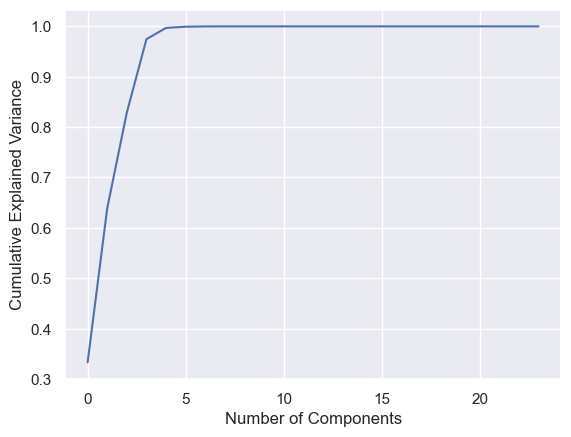

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [82]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
n_components

4

In [83]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (54360, 24)
Reduced shape: (54360, 4)


In [84]:
print(pca.explained_variance_ratio_)

[0.33289401 0.30603245 0.19007635 0.14554539]


Text(0, 0.5, 'cumulative explained variance')

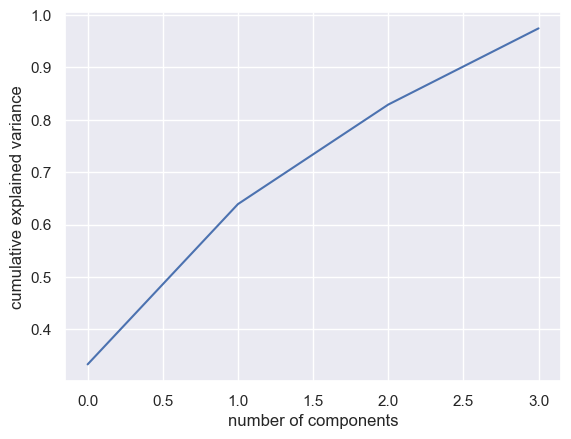

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<Axes: >

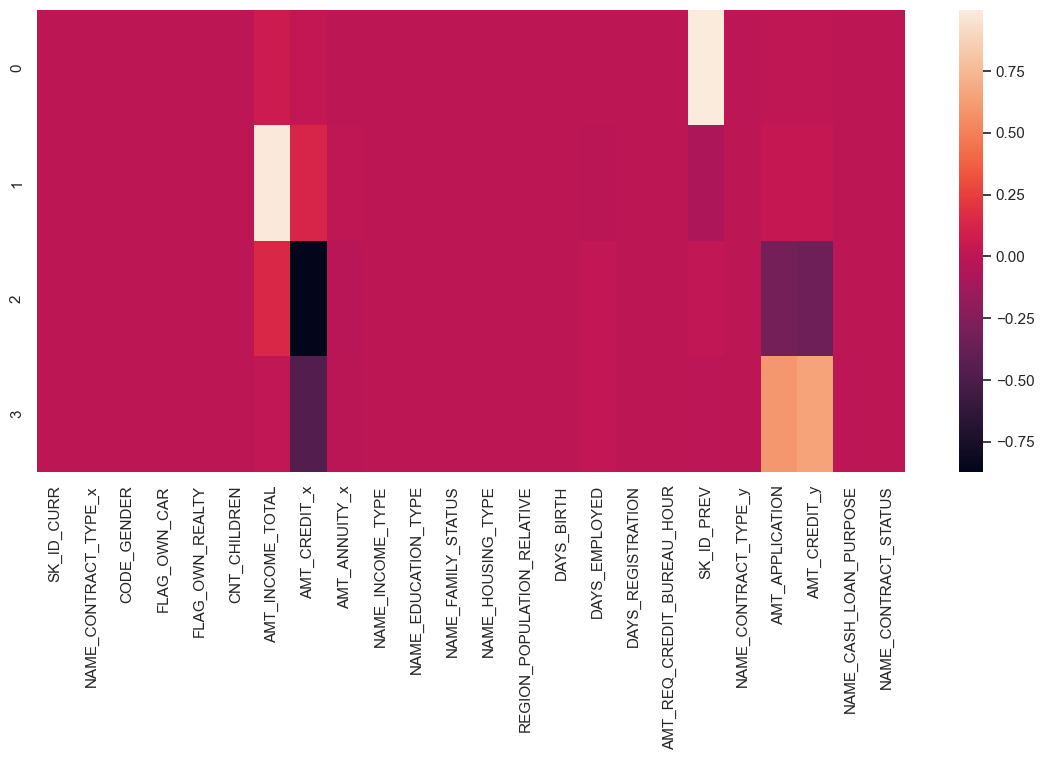

In [86]:
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
sns.heatmap(df_comp)

# Model Building

Modelling: we separate features (predictors, the “X”) from the target variable (the “y”- Defaulter) and create the Train and Test subsets. we will use few model like Logistic Regression,KNN,Randomforest and try to compare the accuracy and model fitting for target variable-Defaulters 

## Logistic Regression



We will use pipeline to cascade multiple steps like PCA,Model fitting.

In [87]:
logreg = LogisticRegression(random_state=42)

pipeline = Pipeline([('pca', pca), ('logreg', logreg)])

In [88]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('logreg', LogisticRegression(random_state=42))])

In [89]:
y_pred = pipeline.predict(X_test_scaled)

In [90]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9206033848417955


### Calculating Train and Test score

In [91]:
train_score = pipeline.score(X_train_scaled, y_train)

test_score = pipeline.score(X_test_scaled, y_test)

print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

Training Score: 0.9219278881530537
Test Score: 0.9206033848417955


Conclusion:

Training and Test cores are, again, close to each other and the difference between them is not significant, which means, it is less likely that the model is overfitting or underfitting. 
Also, model is pretty good taking into consideration accuracy at 92.06%, which is even better than Decision Tree.

We picked Logistic regression since this is binary classification problem and Logistic Regression is a good starting point since it's interpretable, easy to implement and can serve as baseline model, which will be case in our assignmnet. 

# 

## Random Forest



In [92]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [93]:
pipeline = Pipeline([('pca', pca), ('rf_classifier', rf_classifier)])

RandomForestClassifier()


In [94]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('rf_classifier', RandomForestClassifier(random_state=42))])

In [95]:
y_pred = pipeline.predict(X_test_scaled)

In [96]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9200883002207505


### Calculating Train and Test score

In [97]:
train_score = pipeline.score(X_train_scaled, y_train)
test_score = pipeline.score(X_test_scaled, y_test)

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9466028942850135
Testing Score: 0.9200883002207505


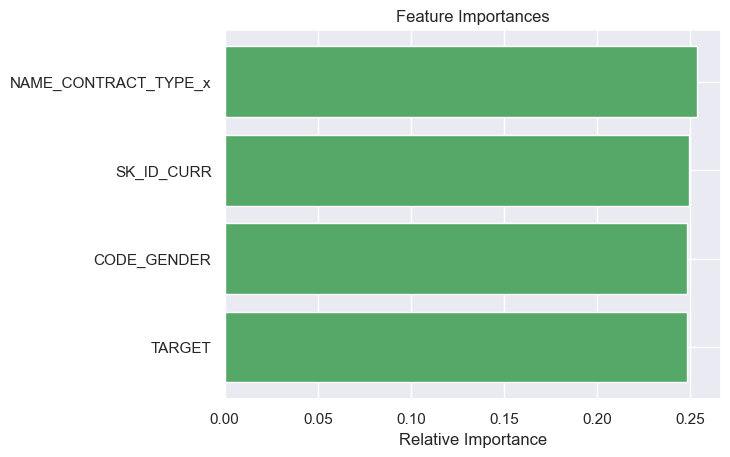

In [98]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Conclusion:

Accuracy is the highest so far, out of all models - 92.02%. When it comes to training score - scores suggest that model perform really well on data it was trained on, which means that model has learned patterns in training data well. Testing score (92.02%)  is saying that model's performance on new, unseen data is also quite good. In terms of overfitting and underfitting, training and testing scores are still reasonably close to each other, which shows good balance. It shows signs of slight overfitting, but it's still doing good job in generaliziinig to new situations.

We picked Random Forest because it's reliable in predictions due to using multiple decision trees. Also, it's good with handling overfitting as introduces randomness in its tree-building process and making the model more robust. 

# 

## KNN Classification

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [100]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [101]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9238410596026491


In [103]:
scores.append(model.score(X_test,y_test))

SHAP

Now, just to get a basic impression of the model, I recommend to view the feature importers and confusion matrix. Just to understand where we stand with the feature importance, I used scikit-learn that computes the impurity decrease within each tree.
We will try to explain our model with the help of “shap” library in Python, which utilizes Shapley values and provides a game-theoretic approach to explain the output of (almost) any Machine Learning model. There are already multiple online resources about the intuition and calculation of Shapley values, so in this article we will mostly care about how to interpret them and understand their contribution to the model’s final predictions.

The “shap” library provides numerous great plots, depending on whether you need global or single-case explainability:

## a) General explainability

In [104]:
feature1_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 
                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
                'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 
                'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']

In [105]:
#Divide the dataset in X and y according to the dependent variable "TARGET".
X= df[feature1_cols]
y=df['TARGET']

In [106]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54360, 20), (54360,), (40770, 20), (13590, 20), (40770,), (13590,))

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.70941084 -0.73030189  0.64514734 ... -0.22320399 -0.26428554
  -0.55998136]
 [ 0.70941084  1.36929674  0.64514734 ...  0.47208085  0.48384776
   1.14001913]
 [-1.40776066 -0.73030189 -1.55003352 ... -0.30510204 -0.3411054
  -0.55998136]
 ...
 [-1.40776066 -0.73030189 -1.55003352 ...  2.09704216  1.87205787
   1.14001913]
 [-1.40776066  1.36929674 -1.55003352 ... -0.45613317 -0.48033204
  -0.55998136]
 [ 0.70941084  1.36929674  0.64514734 ... -0.35664942 -0.39945591
  -0.55998136]] 	 [[ 0.70941084 -0.73030189  0.64514734 ... -0.33028894 -0.36288294
  -0.55998136]
 [ 0.70941084 -0.73030189 -1.55003352 ... -0.52187188 -0.55266339
  -0.55998136]
 [ 0.70941084 -0.73030189  0.64514734 ... -0.6112267  -0.62155357
   1.14001913]
 ...
 [ 0.70941084 -0.73030189  0.64514734 ... -0.15876525 -0.2070156
  -0.55998136]
 [-1.40776066  1.36929674  0.64514734 ...  1.6871908   1.49469134
  -0.55998136]
 [ 0.70941084  1.36929674 -1.55003352 ... -0.31873366 -0.37917453
  -0.55998136]] 	 [[-1.40776066 

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_scaled, y_train)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[12511,     0],
       [ 1079,     0]])

In [109]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9206033848417955 0.0


In [110]:
test3_accuracy = accuracy_score(y_test, y_pred)
test3_precision = precision_score(y_test, y_pred)
test3_recall = recall_score(y_test, y_pred)
test3_f1 = f1_score(y_test, y_pred)

print("Test3 Accuracy (Gini):", test3_accuracy)
print("Test3 Precision (Gini):", test3_precision)
print("Test3 Recall (Gini):", test3_recall)
print("Test3 F1 Score (Gini):", test3_f1)

Test3 Accuracy (Gini): 0.9206033848417955
Test3 Precision (Gini): 0.0
Test3 Recall (Gini): 0.0
Test3 F1 Score (Gini): 0.0


SHAP

In [111]:
# SHAP explainer LinerExplainer is used to calculate logisticRegression
explainer = shap.LinearExplainer(lr, X_train, feature_perturbation="interventional")
# SHAP values calculated on X_train set
shap_values = explainer.shap_values(X_train)

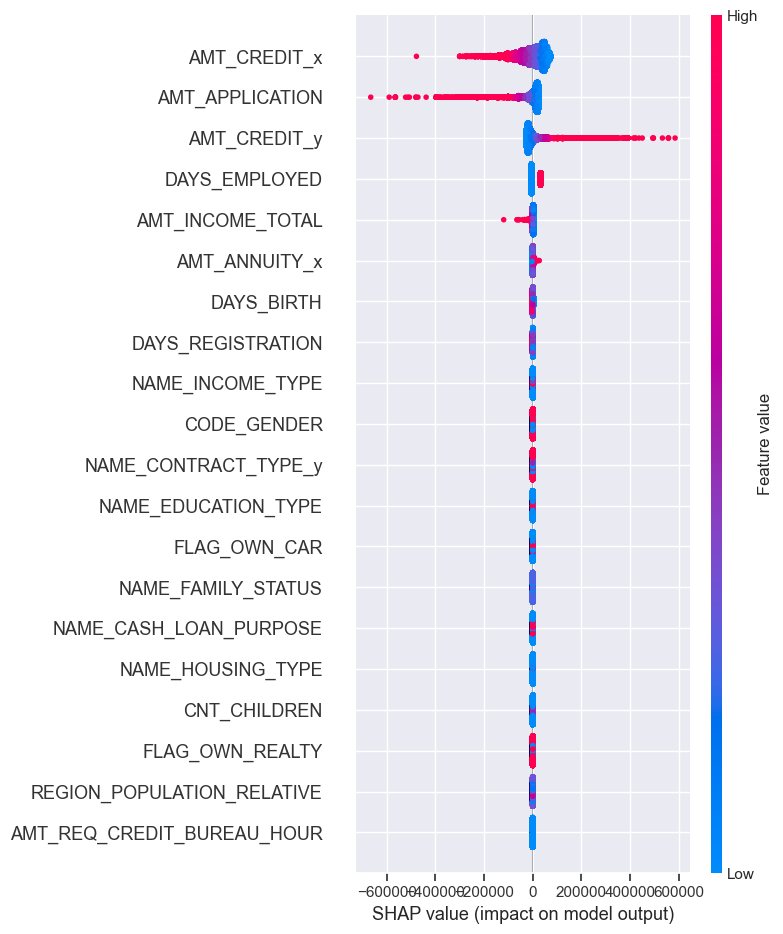

In [112]:
# SHAP Summary plot
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

Red means high values of a feature (e.g. AMT_APPLICATION), while blue means small values (e.g. 'Name_Contract_Type_y'). Distance from axis means magnitude of impact of this feature (how impactful/powerful is), depending on high/small values. Side of axis is related to direction of prediction. When the feature values are on the right side, the predicted value is higher. When on the left side, the predicted value is smaller. We see that regarding AMT_APPLICATION, high (red) values (meaning recent years) have a higher impact on the model output. However, blue values AMT_CREDIT_y don’t have that much of an impact (not far from 0) and, intuitively.

As AMT_APPLICATION -For how much credit did client ask on the previous application , increases with AMT_CREDIT is Final credit amount on the previous application impact on model also increases linearly.

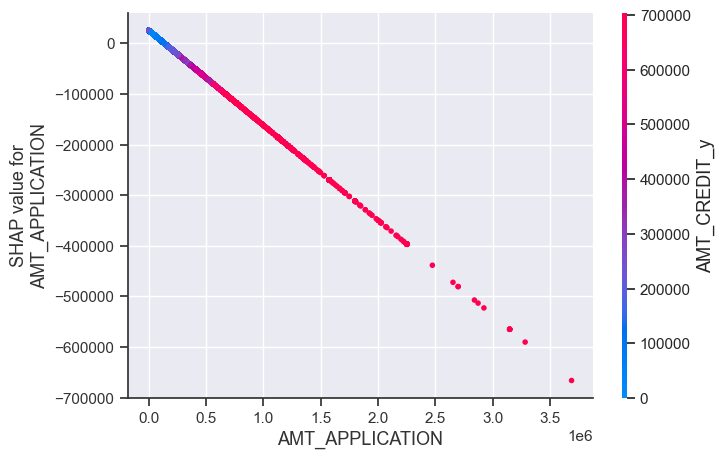

In [113]:
# SHAP dependence plot for AMT_APPLICATION
shap.dependence_plot('AMT_APPLICATION', shap_values, X_train)

This differs from Total income in a way that the AMT_Employed there is less impact on the days prediction of Target variable.

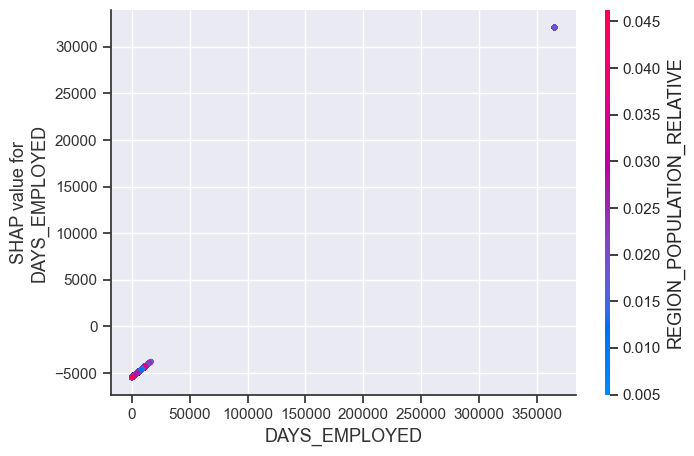

In [114]:
# SHAP dependence plot for Days Of Employed 
shap.dependence_plot('DAYS_EMPLOYED', shap_values, X_train)

there is less impact on the model prediction for Target variable for Days Employed and Education type.

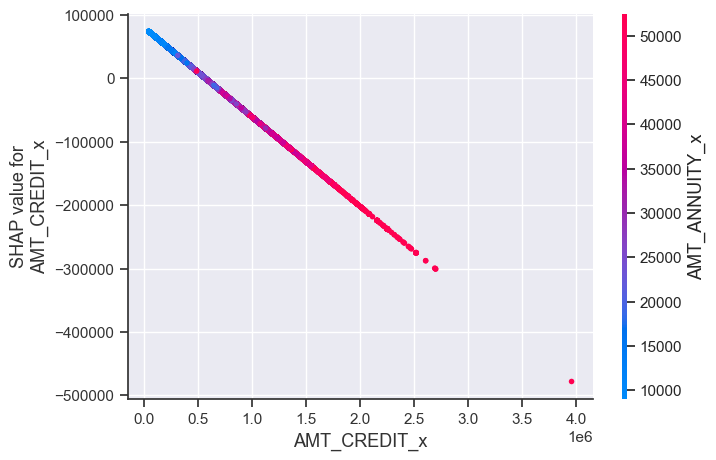

In [115]:
# SHAP dependence plot for AMT_CREDIT
shap.dependence_plot('AMT_CREDIT_x', shap_values, X_train)

There is a sharp dependencies observered for AMT_credit and as the value increases irrespect of AMT_ANNUITY decrease there s huge impact on model prediction.

Dependence Plot:
Each dot is a single prediction (row) from the dataset. The x-axis is the actual value from the dataset. The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction. The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

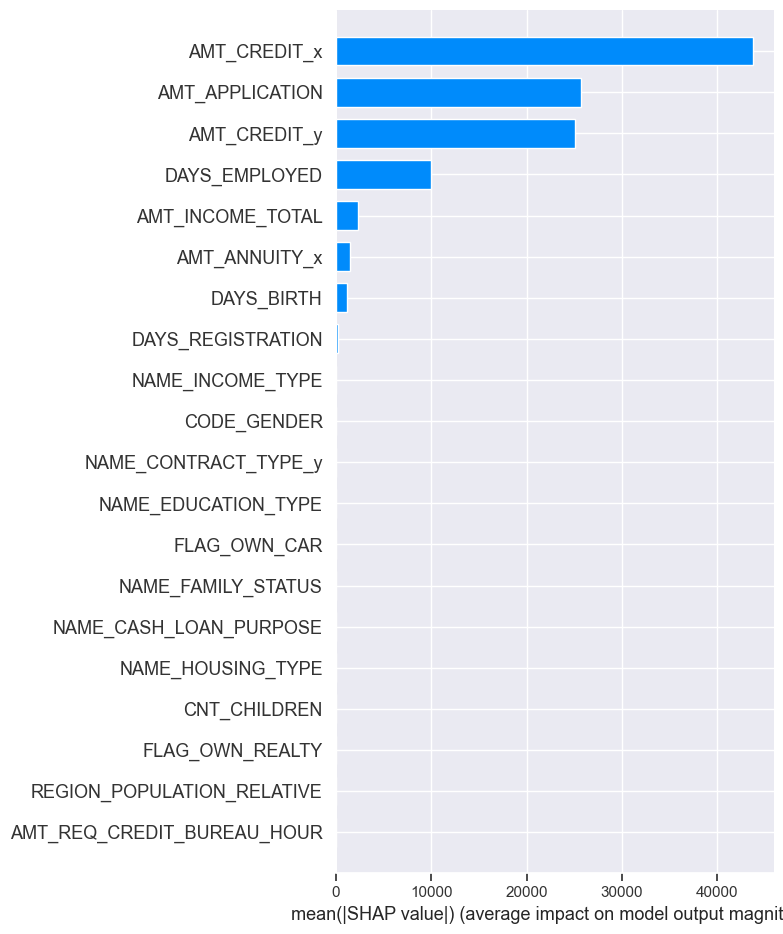

In [116]:
# SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

The predicted Defaulters is driven down mainly because of these 7 reasons: AMT_APPLICATION -For how much credit did client ask on the previous application AMT_CREDIT is Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT Days of Employed Total imcome Age Annuity of previous application

### Evaluation:

Building list of models to be trained

In [117]:
model_rf = RandomForestClassifier(random_state=1, n_jobs=-1)
model_logr = LogisticRegression(random_state=1, n_jobs=-1, multi_class='multinomial')
model_knn=KNeighborsClassifier()
model_xgb = XGBClassifier(random_state=1, n_jobs=-1)
model_gbr = GradientBoostingClassifier(random_state=1)
model_cat = CatBoostClassifier(random_state=1, verbose=0)

models = []
models.append(('RF',model_rf))
models.append(('KNN',model_knn))
models.append(('GBR',model_gbr))
models.append(('XGB',model_xgb))
models.append(('CAT',model_cat))

In [118]:
scaler = StandardScaler()

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
feature = SelectFromModel(model_rf, threshold=0.001)

In [119]:
# calculating multiple model and evaluation
results = []
names = []
for name, model in models:
    pipe = Pipeline([(name, model)]) # including feature selection step using RF
    
    scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose=0)
    names.append(name)
    results.append(scores)
    print("model %s accuracy: %.4f variance: %.4f"%(name, np.mean(scores), np.std(scores)))

/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

model RF accuracy: 0.9219 variance: 0.0001


/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

model KNN accuracy: 0.9175 variance: 0.0006


/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

model GBR accuracy: 0.9219 variance: 0.0001


/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

model XGB accuracy: 0.9205 variance: 0.0006


/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/parvind/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

model CAT accuracy: 0.9217 variance: 0.0002


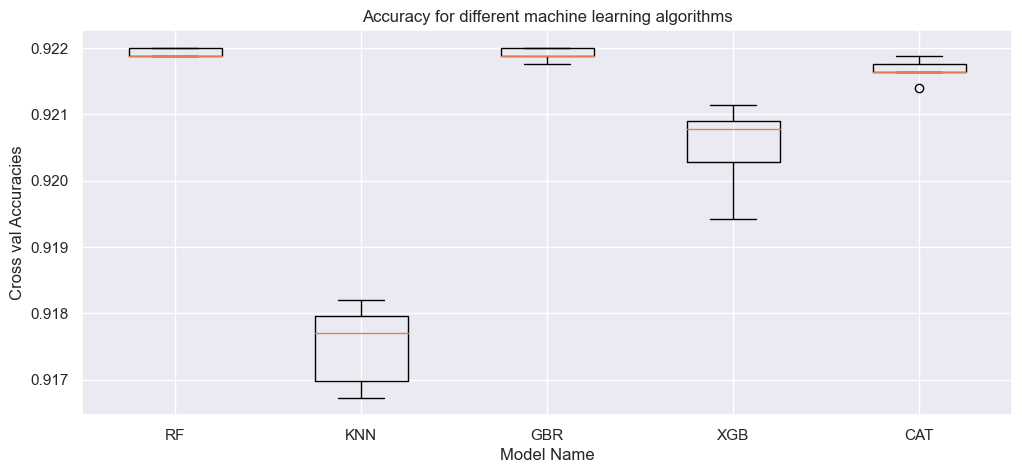

In [120]:
plt.figure(figsize=(12,5))
plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names)
plt.title("Accuracy for different machine learning algorithms")
plt.xlabel("Model Name")
plt.ylabel("Cross val Accuracies")
plt.show()

### Conclusion

we conducted a more in-depth analysis of the important variables behind loan default,contract status and identify patterns indicating clients' difficulty in paying instalments, and refine the predictive model. This may involve exploring additional variablesabd utilizing more advanced machine-learning techniques like SHAP. By refining and building a better model, we can enhance our ability to predict defaulters and contract status accurately. This will enable us to make informed decisions in loan application evaluations, mitigate risks associated with loan default, and improve the overall success rate of loan contracts. In conclusion, this assignment provided valuable insights into loan default and success application status. It highlighted the importance of analysing important variables, identifying patterns, and refining the predictive model to make more accurate predictions. By addressing these aspects, we can enhance decision-making processes, minimize default risks, and improve loan contract outcomes.